In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
from sklearn.preprocessing import MinMaxScaler # scaling down huge values in dataset
scaler = MinMaxScaler()

## **Introduction**

**As per the problem statement the target columns are NFL,NFH, so i have constructed two different categories of algorithms (Time series Forecasting of NFH and NFL without scaling) and (Time series Forecasting of NFH and NFL with scaling), under each category there would be two different algorithms dependent model algorithm and independent model algorith**

**Dependent Model Algorithm(Pipeline Model): This model makes an assumption that NFH column is independent and hence makes the training/prediction followed by time forecasting , followed by which NFL column would be  training/prediction of features including NFH column followed by time series forecasting or in other words the NFL column training/prediction followed by time seriesforecasting would be dependent on NFH column and other columns.**


**Independent Model Algorithm: This model trains NFH column seperately and NFL column seperately  and makes time series forecasting i.e( In the dataset during NFH training/prediction followed by timeseries forecasting ,NFL column wont be present similarly in the dataset during training/prediction Similarly for training/prediction of NFL, NFH column wont be present during training/prediction and based on the training time series forecasting would be done.**


Note:

1)The input width of the window and label length of the window would purely depend on the num_features(number of columns).

2)The current epochs count for both the models under each category would be 20 sir, if in case ,you feel like you want to increase the epoch count sir , kindly do mention the count under the compile function for both of the models seperately sir

**Important Note: KIndly run the code cells in order so as to obtain accurate results sir**

**References**

Link:https://www.tensorflow.org/tutorials/structured_data/time_series 


**Important Note: KIndly run the code cells in order so as to obtain accurate results sir**

# **Time Series Forecasting of NFH and NFL with scaling(MinMaxScaler)**

##**Data PreProcessing**

In [ ]:
def process(df):
  # input: unprocessed dataframe
  # output: processed dataframe
  df.reset_index(inplace=True)
  p=list(df.iloc[:,-1].values)
  #p.pop(0)
  df=df.drop(columns=['nfl_data']) # removing the header of dataframe
  df=df.rename(columns={"level_0":"Index","level_1":"Date(IST)","level_2":"NFO","level_3":"NFH","level_4":"NFL","level_5":"NFC","level_6":"FIIB","level_7":"FIIS","level_8":"FIIN","level_9":"DIIB","level_10":"DIIS","level_11":"DIIN","level_12":"August","level_13":"December","level_14":"CAD","level_15":"DAD","level_16":"DOD","level_17":"NDAD","level_18":"Currey","level_19":"Flow","level_20":"Shine"})
  df['Vega']=p
  df=df.drop(0)
  #print(df.columns)
  df=df.drop(columns=['Index'])
  df=df.dropna(how='any')
  date_time = pd.to_datetime(df.pop('Date(IST)'), format='%Y-%m-%d %H:%M:%S')
  df['NFO']=pd.to_numeric(df['NFO'])
  df['NFO']=scaler.fit_transform(df['NFO'].values.reshape(-1,1)).astype('float64')
  df['NFH']=pd.to_numeric(df['NFH']).astype('float64')
  df['NFL']=pd.to_numeric(df['NFL']).astype('float64')
  df['NFC']=pd.to_numeric(df['NFC'])
  df['NFC']=scaler.fit_transform(df['NFC'].values.reshape(-1,1)).astype('float64')
  df['FIIB']=pd.to_numeric(df['FIIB'])
  df['FIIB']=scaler.fit_transform(df['FIIB'].values.reshape(-1,1)).astype('float64')
  df['FIIS']=pd.to_numeric(df['FIIS'])
  df['FIIS']=scaler.fit_transform(df['FIIS'].values.reshape(-1,1)).astype('float64')
  df['FIIN']=pd.to_numeric(df['FIIN'])
  df['FIIN']=scaler.fit_transform(df['FIIN'].values.reshape(-1,1)).astype('float64')
  df['DIIB']=pd.to_numeric(df['DIIB'])
  df['DIIB']=scaler.fit_transform(df['DIIB'].values.reshape(-1,1)).astype('float64')
  df['DIIS']=pd.to_numeric(df['DIIS'])
  df['DIIS']=scaler.fit_transform(df['DIIS'].values.reshape(-1,1)).astype('float64')
  df['August']=pd.to_numeric(df['August'])
  df['August']=scaler.fit_transform(df['August'].values.reshape(-1,1)).astype('float64')
  df['December']=pd.to_numeric(df['December'])
  df['December']=scaler.fit_transform(df['December'].values.reshape(-1,1)).astype('float64')
  df['CAD']=pd.to_numeric(df['CAD']).astype('float64')
  df['DAD']=pd.to_numeric(df['DAD']).astype('float64')
  df['DOD']=pd.to_numeric(df['DOD']).astype('float64')
  df['NDAD']=pd.to_numeric(df['NDAD']).astype('float64')
  df['Flow']=pd.to_numeric(df['Flow']).astype('float64')
  df['Currey']=pd.to_numeric(df['Currey']).astype('float64')
  df['Shine']=pd.to_numeric(df['Shine']).astype('float64')
  df['Vega']=pd.to_numeric(df['Vega']).astype('float64')
  #df = df[5::6]
  return df,date_time

In [ ]:
df=pd.read_csv('csv_nfl_data.csv')
df,date_time=process(df)
df

,NFO,NFH,NFL,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega
1,0.550682,12177.119957,12151.571552,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999
2,0.560137,12275.487382,12173.355954,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000
3,0.569330,12299.127043,12181.887534,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000
4,0.565106,12242.227141,12030.371144,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000
5,0.554650,12192.474725,11985.555622,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.991474,15871.734957,15673.598435,0.978029,0.063734,0.123039,0.145925,0.302320,0.279636,1138.76,0.063936,0.573867,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999
353,0.985429,15846.875708,15703.024907,0.984289,0.059193,0.083988,0.205656,0.432029,0.378875,1832.76,0.091081,0.387393,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000
354,0.991094,15869.452759,15764.937429,0.993188,0.024723,0.060763,0.179197,0.325005,0.294814,1277.08,0.090986,0.412344,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000
355,1.000000,15910.968841,15804.933350,0.993143,0.116848,0.135800,0.227135,0.595092,0.618669,1810.05,0.075286,0.506894,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000


In [ ]:
df.head()

,NFO,NFH,NFL,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega
1,0.550682,12177.119957,12151.571552,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.397,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999
2,0.560137,12275.487382,12173.355954,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.510,-1.33,0.46,0.4430,0.5648,0.08,1.550000
3,0.569330,12299.127043,12181.887534,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.015,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000
4,0.565106,12242.227141,12030.371144,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.050,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000
5,0.554650,12192.474725,11985.555622,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.305,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000


## **Data Visualization**

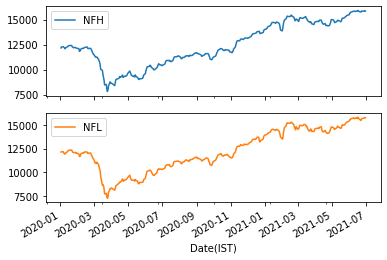

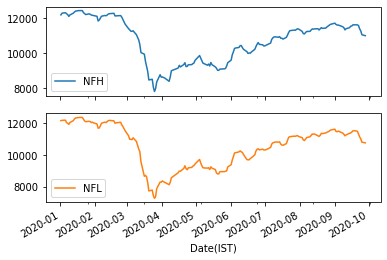

In [ ]:
plot_cols = ['NFH', 'NFL']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)
plot_features = df[plot_cols][:177]
plot_features.index = date_time[:177]
_ = plot_features.plot(subplots=True)

### **Data Description**

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NFO,355.0,0.583538,0.255231,0.000000,0.417010,0.548278,0.840223,1.000000
NFH,355.0,12472.301870,2131.192420,7819.610704,11071.452300,12121.683483,14698.970930,15921.677431
NFL,355.0,12280.436920,2163.640851,7264.768634,10899.791747,11990.374901,14444.825602,15814.822034
NFC,355.0,0.580593,0.256592,0.000000,0.415247,0.542245,0.842293,1.000000
FIIB,355.0,0.071885,0.075083,0.000000,0.037746,0.055992,0.083140,1.000000
FIIS,355.0,0.083482,0.074850,0.000000,0.048626,0.067327,0.094070,1.000000
FIIN,355.0,0.231305,0.074894,0.000000,0.196861,0.227934,0.255669,1.000000
DIIB,355.0,0.243699,0.137760,0.000000,0.153388,0.210774,0.296753,1.000000
DIIS,355.0,0.350502,0.165246,0.000000,0.238057,0.326190,0.451804,1.000000
August,355.0,0.082559,0.056031,0.000000,0.061998,0.084082,0.099262,1.000000


### **Data Visualization using Time Stamp Analysis (Daily and yearly)**

In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [ ]:
timestamp_s

1      1.577923e+09
2      1.578010e+09
3      1.578269e+09
4      1.578355e+09
5      1.578442e+09
           ...     
352    1.624493e+09
353    1.624579e+09
354    1.624838e+09
355    1.624925e+09
356    1.625011e+09
Name: Date(IST), Length: 355, dtype: float64

In [ ]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day)).astype('float64')
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day)).astype('float64')
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year)).astype('float64')
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year)).astype('float64')
df['nfh']=df['NFH']
df['nfl']=df['NFL']
df=df.drop(columns=['NFH','NFL'])

In [ ]:
df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,nfh,nfl
1,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,12177.119957,12151.571552
2,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,12275.487382,12173.355954
3,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,12299.127043,12181.887534
4,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,12242.227141,12030.371144
5,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,12192.474725,11985.555622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.991474,0.978029,0.063734,0.123039,0.145925,0.302320,0.279636,1138.76,0.063936,0.573867,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,-2.140077e-13,1.0,0.136996,-0.990572,15871.734957,15673.598435
353,0.985429,0.984289,0.059193,0.083988,0.205656,0.432029,0.378875,1832.76,0.091081,0.387393,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,-1.046738e-11,1.0,0.119936,-0.992782,15846.875708,15703.024907
354,0.991094,0.993188,0.024723,0.060763,0.179197,0.325005,0.294814,1277.08,0.090986,0.412344,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,-1.212368e-11,1.0,0.068564,-0.997647,15869.452759,15764.937429
355,1.000000,0.993143,0.116848,0.135800,0.227135,0.595092,0.618669,1810.05,0.075286,0.506894,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,-7.825145e-12,1.0,0.051392,-0.998679,15910.968841,15804.933350


### **Data Visualization on a Day Basis**

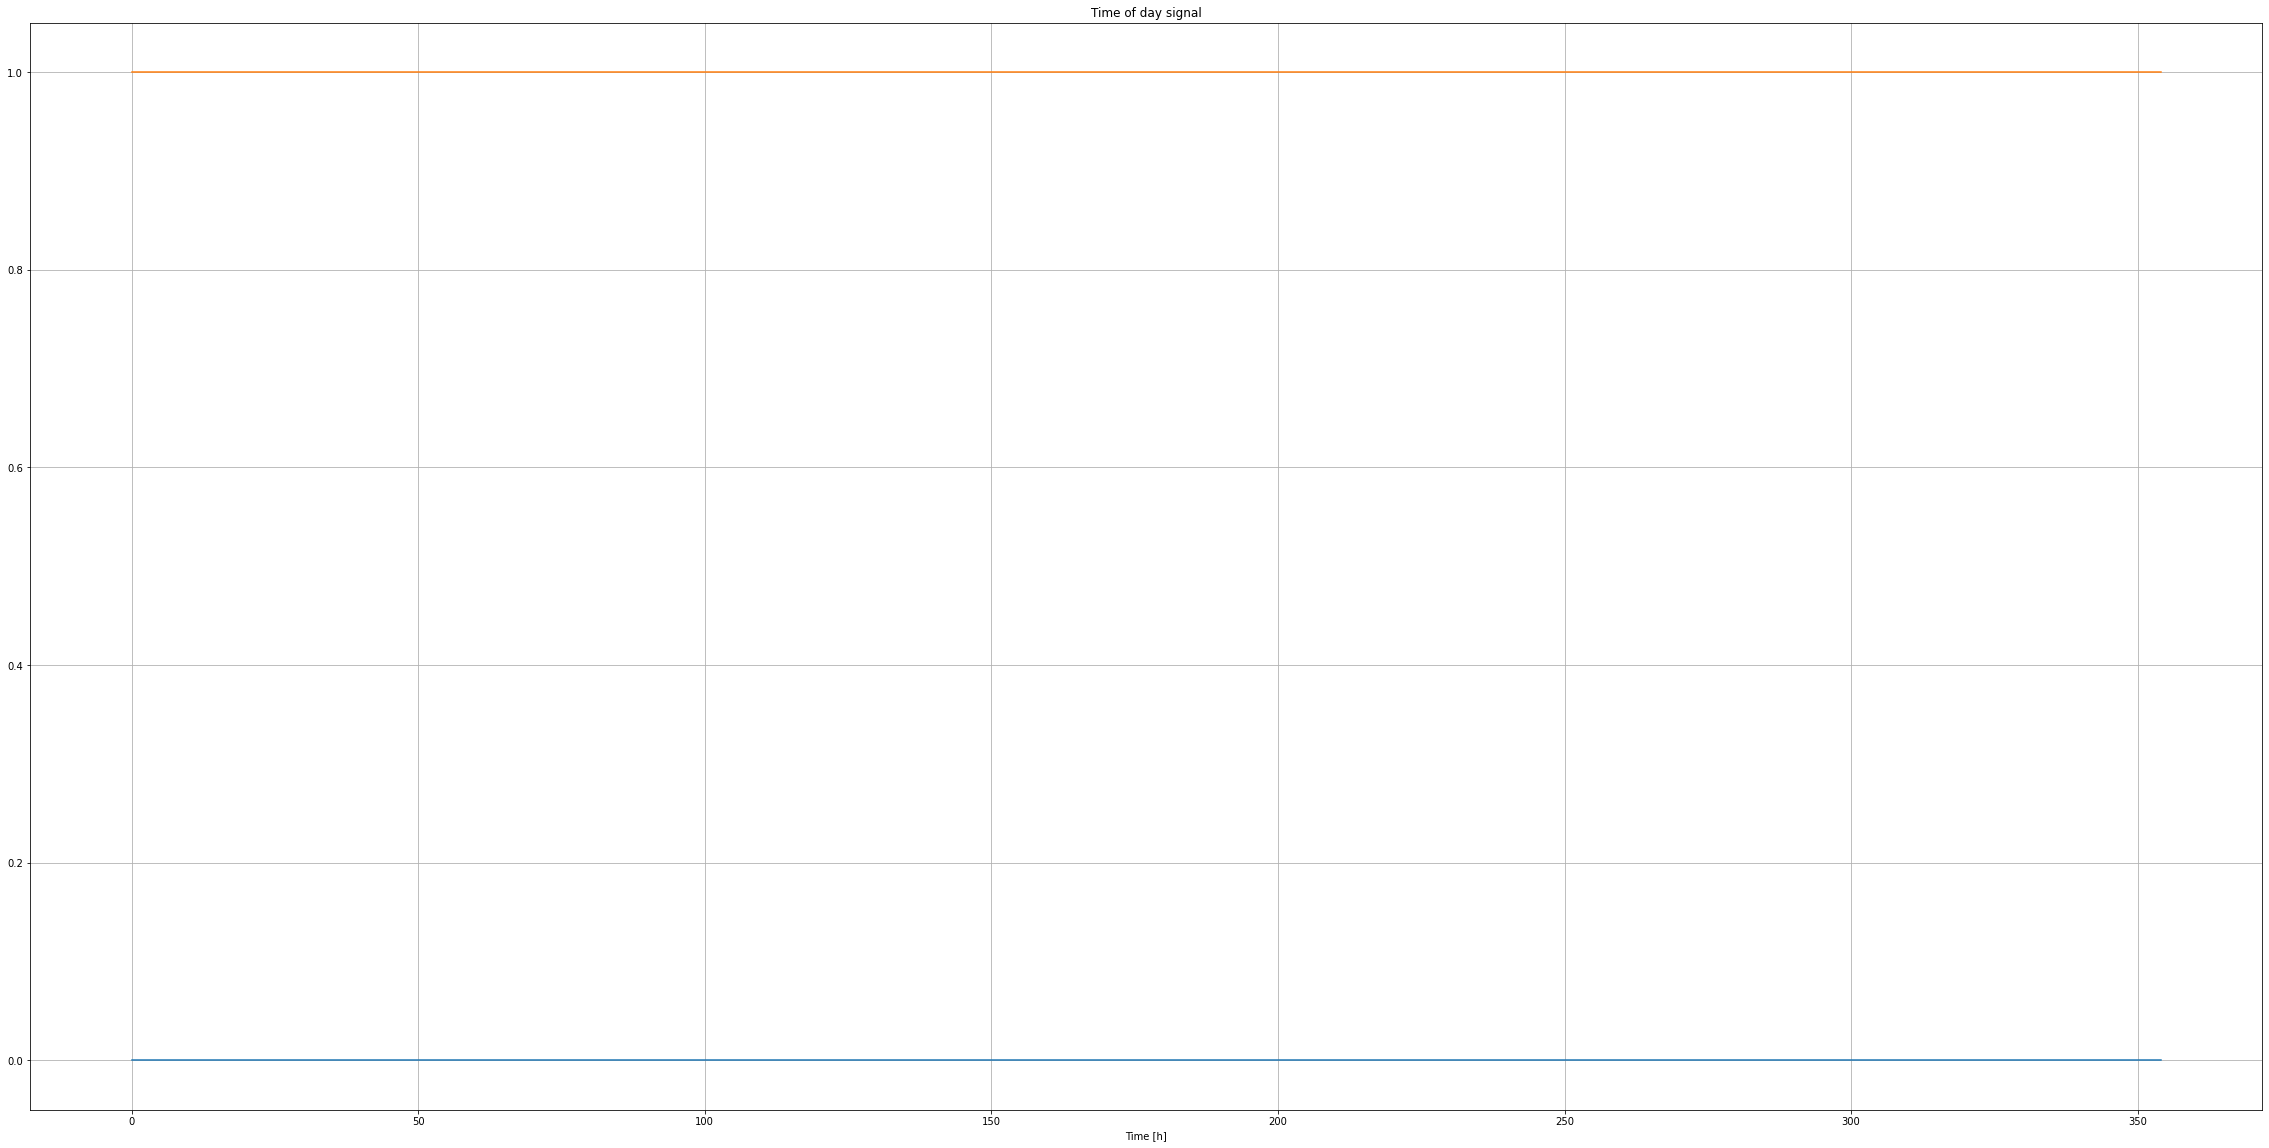

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(np.array(df['Day sin'])[:355])
plt.plot(np.array(df['Day cos'])[:355])
plt.grid(True)
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.show()

### **Data Visualisation on a Yearly Basis**

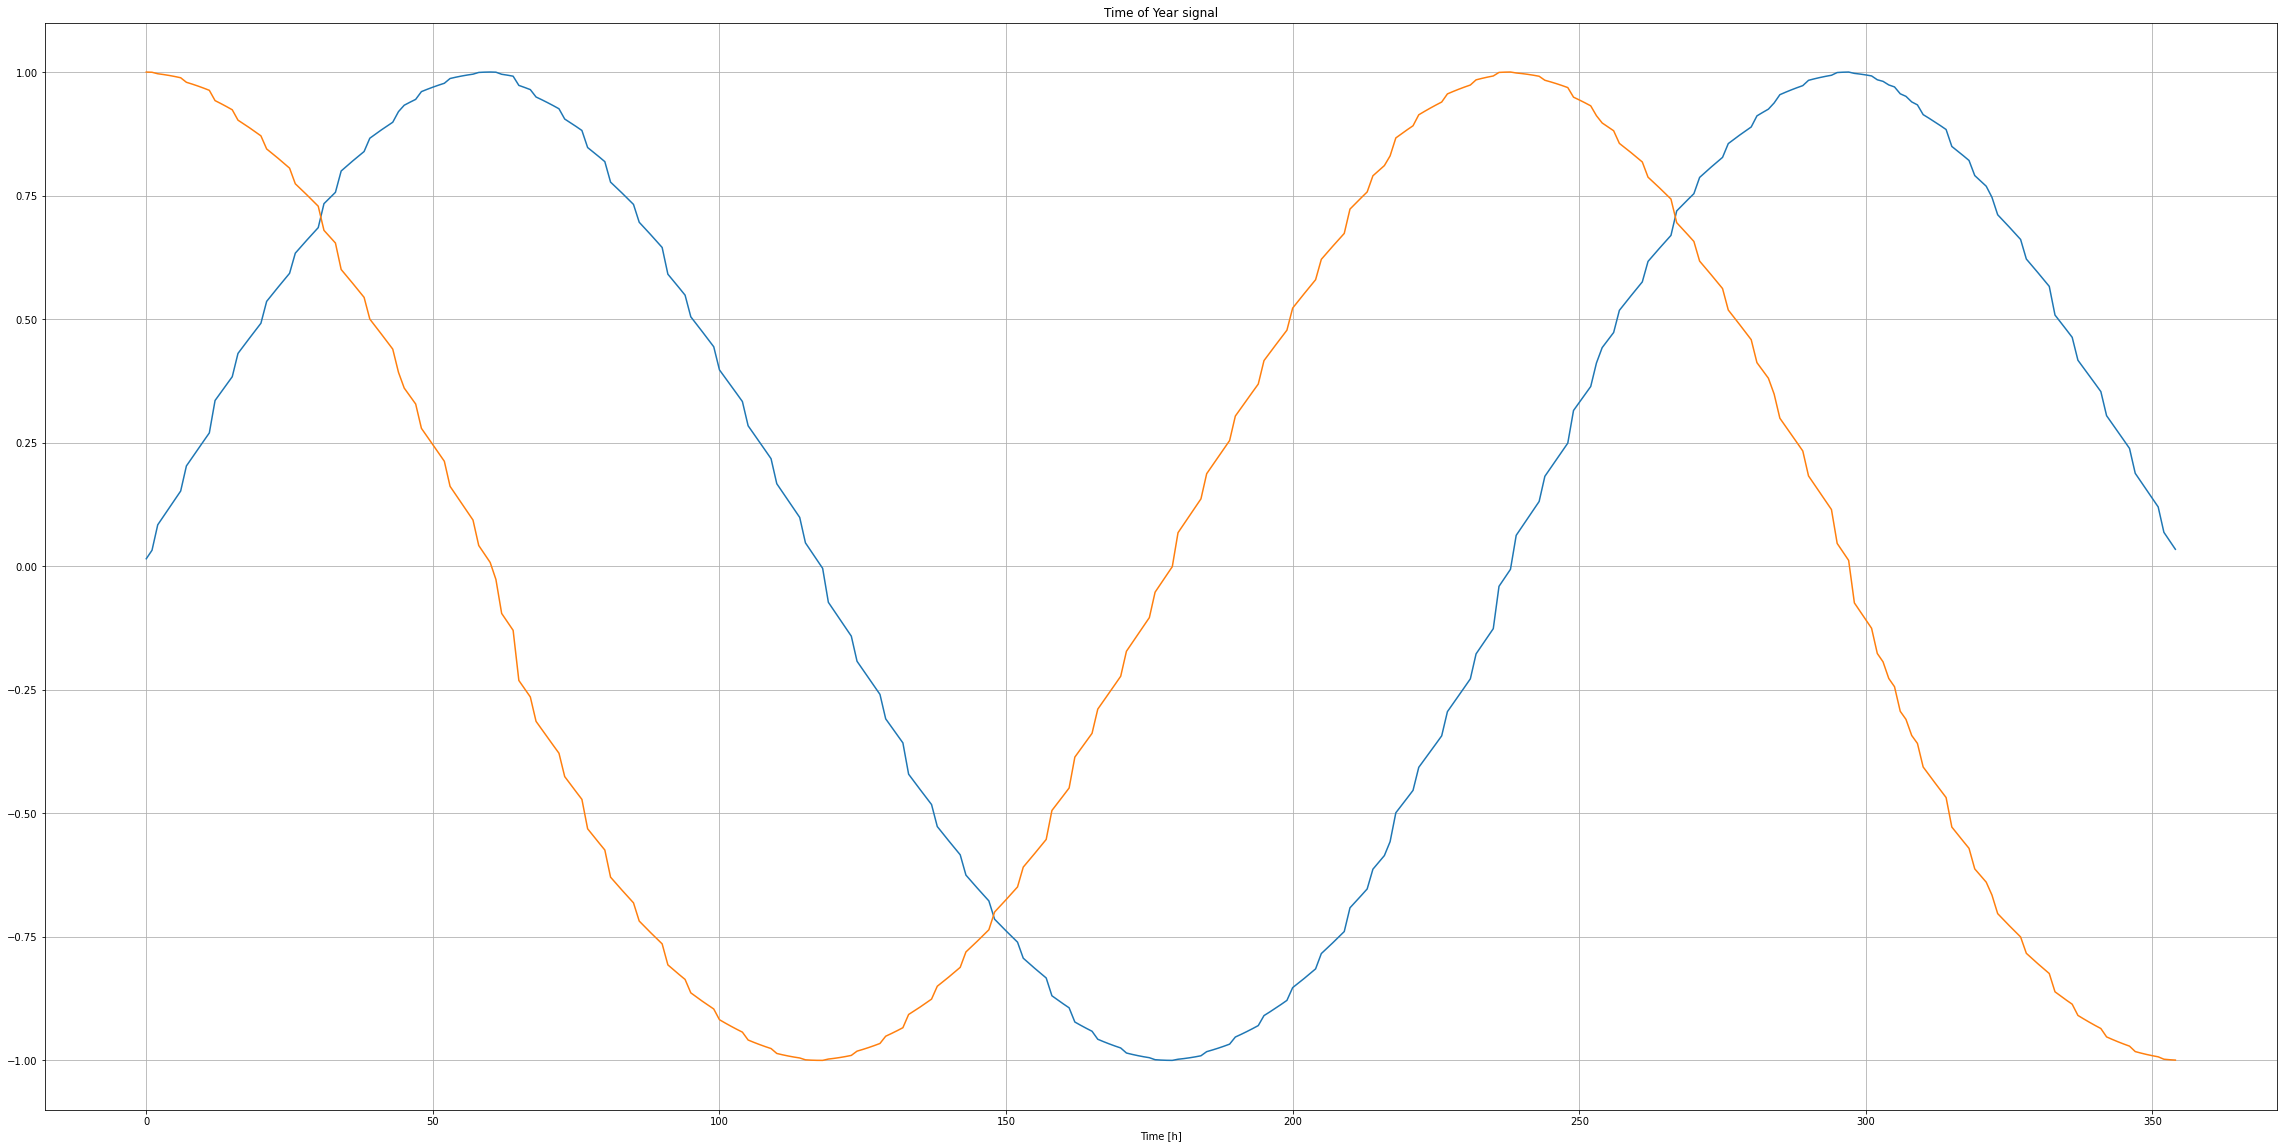

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(np.array(df['Year sin'])[:355])
plt.plot(np.array(df['Year cos'])[:355])
plt.grid(True)
plt.xlabel('Time [h]')
plt.title('Time of Year signal')
plt.show()

### **Data visualization of NFH column using FFT analysis**

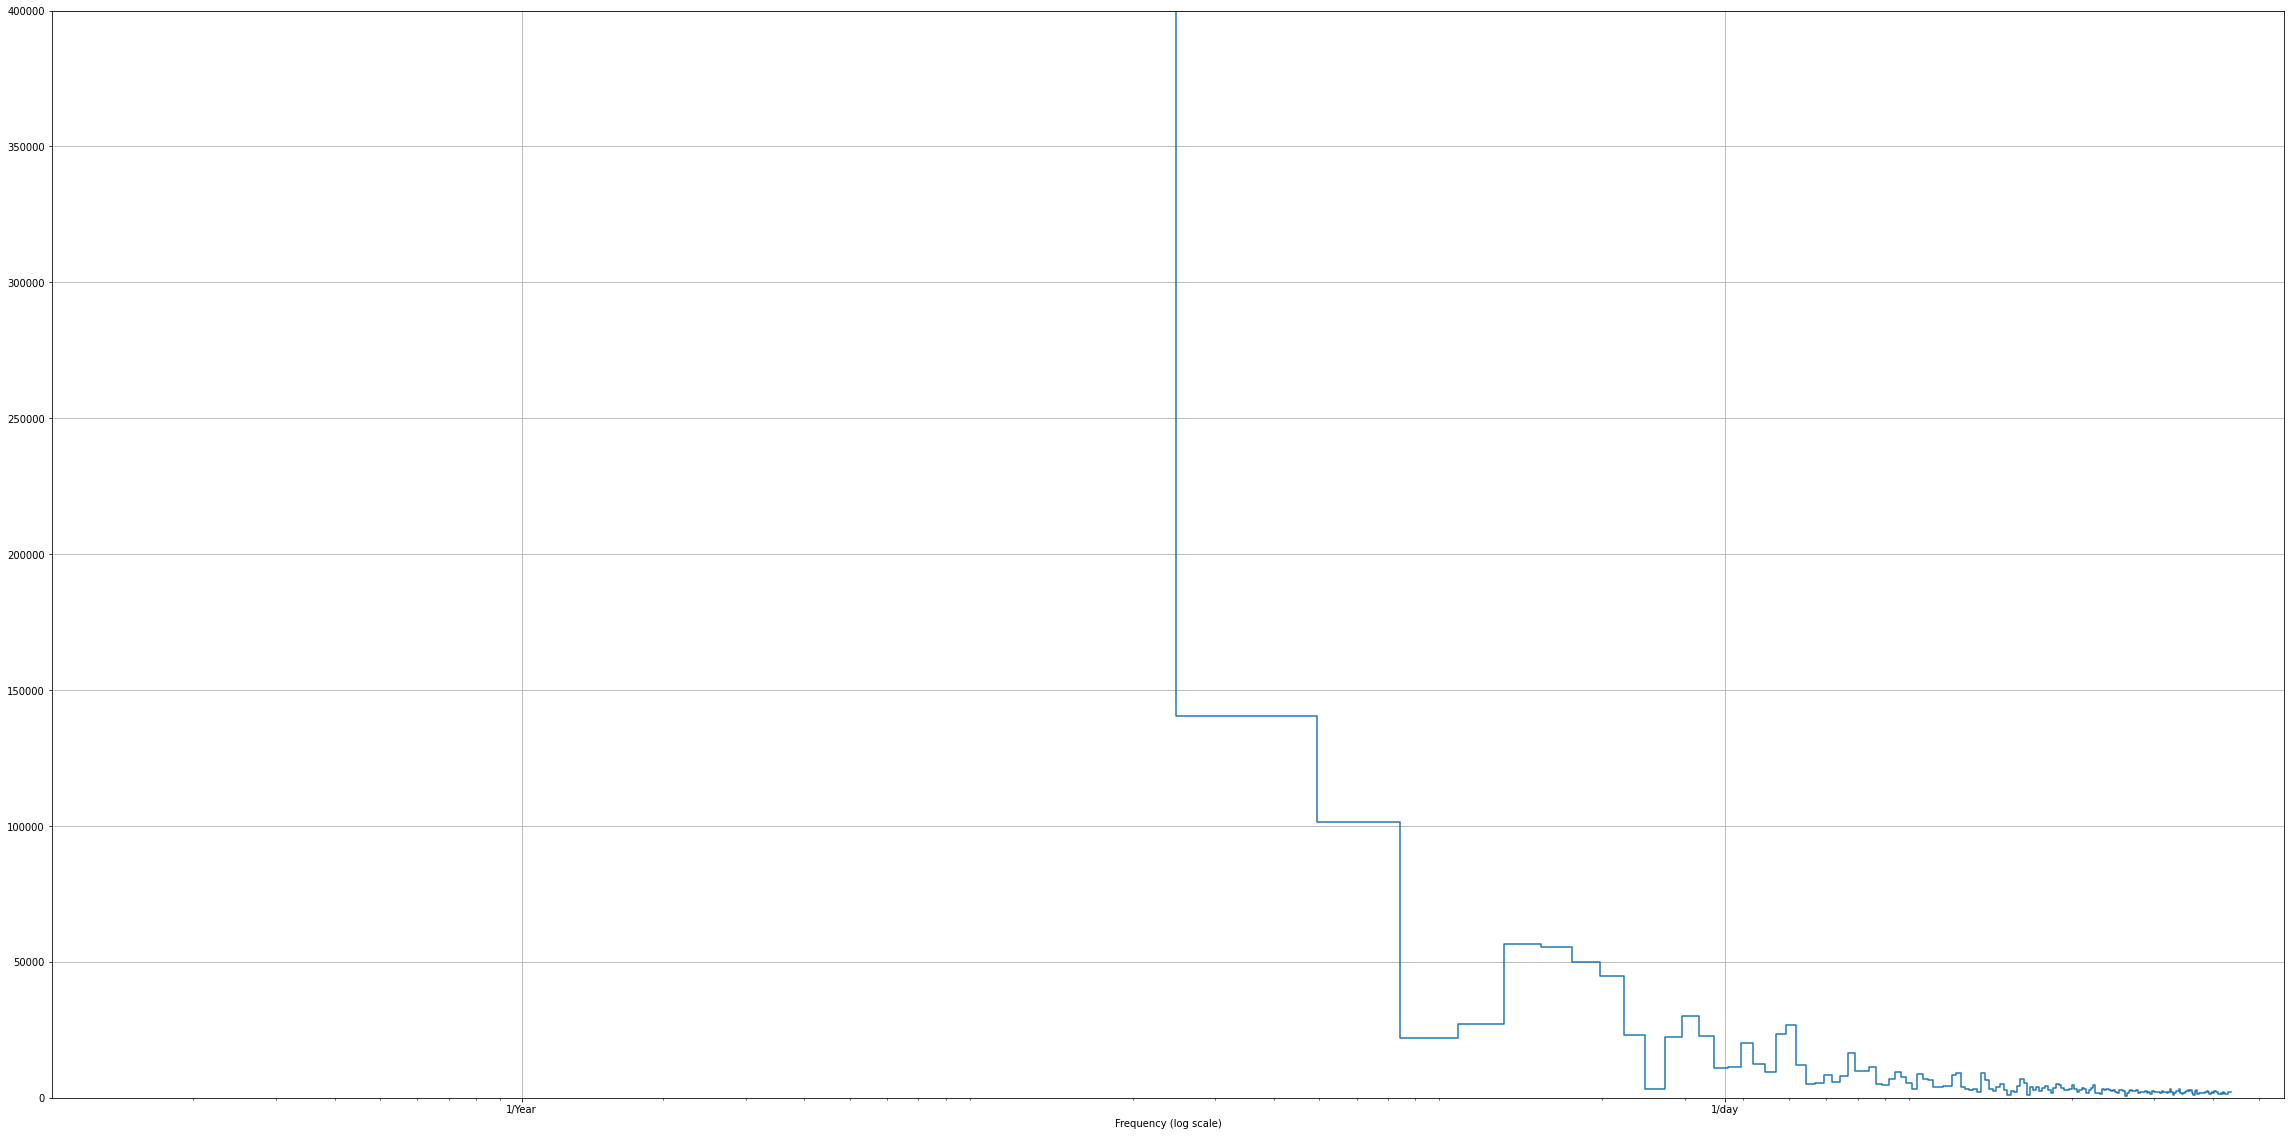

In [ ]:
fft = tf.signal.rfft(df['nfh'])
plt.figure(figsize=(40,20))
f_per_dataset = np.arange(0, len(fft))
n_samples_h = len(df['nfh'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)
plt.grid(True)
f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')
plt.show()

### **Data visualization of NFL column using FFT analysis**

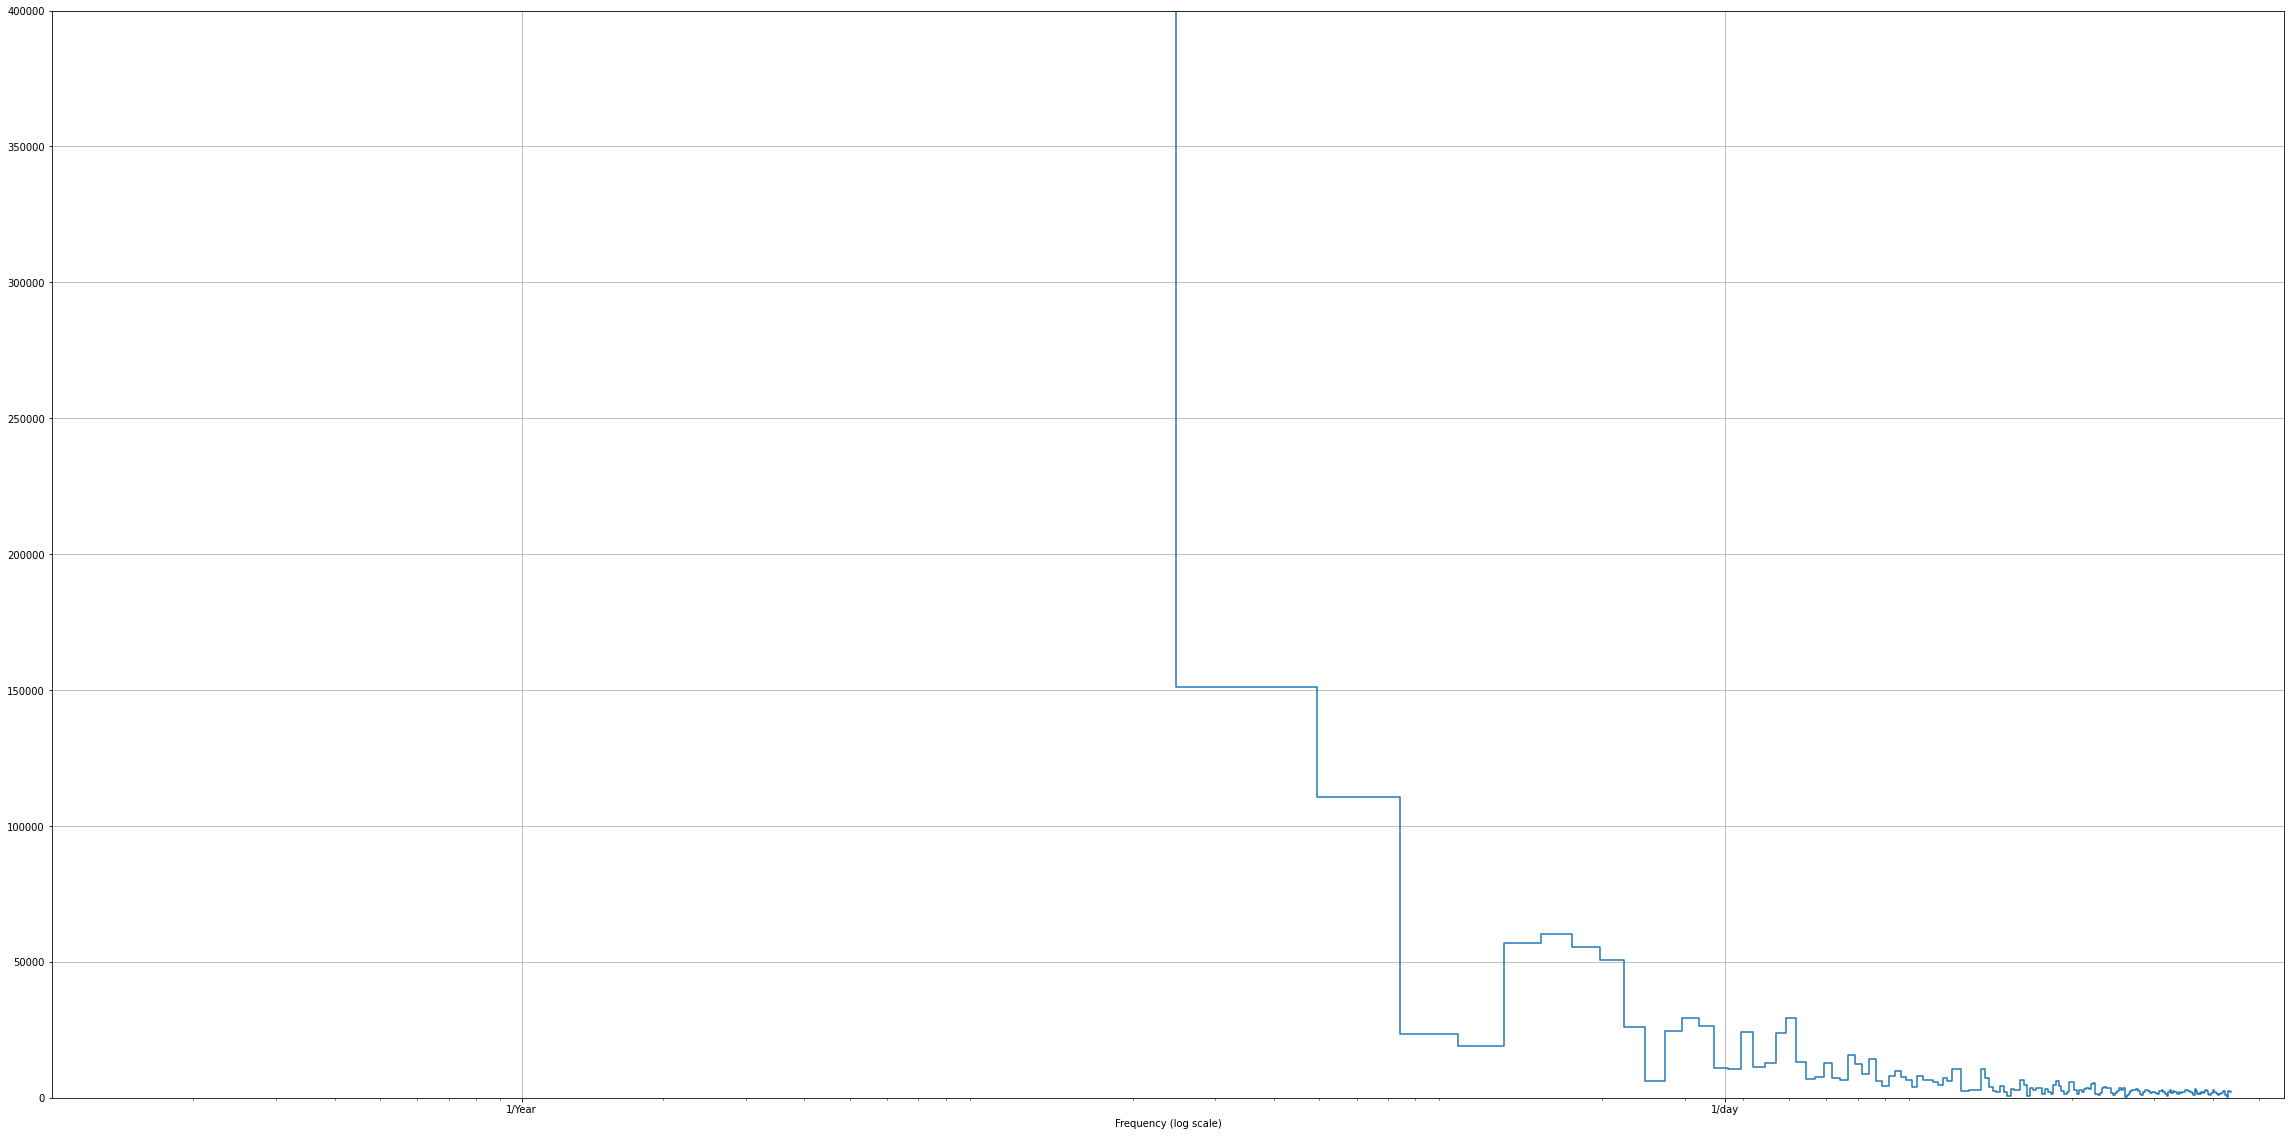

In [ ]:
fft = tf.signal.rfft(df['nfl'])
f_per_dataset = np.arange(0, len(fft))
plt.figure(figsize=(40,20))
n_samples_h = len(df['nfl'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)
plt.grid(True)
f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')
plt.show()

**Conclusion: Based on the above graphs we can conclude that model prediction would be sufficient on a yearly basis and this is true due to the fact that in the dataset we can see date values varying in years so hence this supports the same**

**Scaling of NFH and NFL values**

In [ ]:
 df['nfh']=scaler.fit_transform(df['nfh'].values.reshape(-1,1)).astype('float64')
 df['nfl']=scaler.fit_transform(df['nfl'].values.reshape(-1,1)).astype('float64')


### **Train Test split**

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)] # 70% train dataset
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.3):]# 30% test dataset

train_df=train_df.reset_index()
val_df=val_df.reset_index()
test_df=test_df.reset_index()
train_df=train_df.drop(columns=['index'])
val_df=val_df.drop(columns=['index'])
test_df=test_df.drop(columns=['index'])
train_df1=train_df.copy()
test_df1=test_df.copy()
val_df1=val_df.copy()

**Segregation of train ,test & val datasets**

In [ ]:
train_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,nfh,nfl
0,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,0.537827,0.571552
1,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,0.549968,0.574100
2,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,0.552886,0.575098
3,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,0.545863,0.557377
4,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,0.539722,0.552135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.813531,0.801525,0.147839,0.079317,0.386803,0.250564,0.655676,-2372.54,0.091459,0.377544,-0.21,0.0692,-0.30,2.01,-0.1293,0.3506,-0.80,-0.810001,-5.026111e-12,1.0,0.130923,0.991393,0.804795,0.809794
244,0.815255,0.817144,0.099136,0.069663,0.308742,0.224393,0.648190,-2610.13,0.063464,0.589626,-0.27,-0.5692,0.65,2.09,0.1693,-0.0772,-0.45,2.520000,-6.682411e-12,1.0,0.181890,0.983319,0.814407,0.819800
245,0.833183,0.835068,0.095019,0.104560,0.239417,0.318142,0.620449,-1334.5,0.087960,0.397242,0.83,0.1700,2.18,1.02,-0.2105,0.2796,0.02,-0.750000,-2.383872e-12,1.0,0.198778,0.980044,0.829200,0.836747
246,0.840029,0.848669,0.107597,0.098429,0.274724,0.337656,0.781886,-2370.17,0.052965,0.654629,-0.52,-0.1018,-1.01,0.57,-0.1940,-0.0230,0.06,-1.120001,-1.263725e-11,1.0,0.215608,0.976480,0.842815,0.847269


In [ ]:
val_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,nfh,nfl
0,0.853824,0.856434,0.065761,0.065918,0.250206,0.261301,0.487449,-942.07,0.038873,0.735391,-0.40,-0.7415,-2.34,-2.09,0.0440,-0.4139,-0.54,1.090000,-4.040172e-12,1.0,0.249070,0.968486,0.852822,0.853629
1,0.855066,0.842356,0.058496,0.068817,0.230940,0.281855,0.421855,-199.3,0.125225,0.134603,-0.10,0.3965,0.24,2.22,-0.0010,0.2139,0.25,-1.100000,-1.397932e-12,1.0,0.315070,0.949068,0.851055,0.843933
2,0.835274,0.842230,0.072134,0.052735,0.285795,0.276398,0.499427,-864.62,0.084177,0.410374,-0.45,0.1000,1.02,1.41,-0.2290,0.0200,0.44,-1.660000,-1.165131e-11,1.0,0.331350,0.943508,0.842546,0.837737
3,0.839544,0.852075,0.091551,0.084671,0.267585,0.273642,0.517893,-1039.48,0.046723,0.694025,-0.03,0.1150,-1.01,-2.27,0.0405,-0.0240,-0.15,-0.260000,-7.352770e-12,1.0,0.347531,0.937669,0.848375,0.848244
4,0.857558,0.851191,0.080791,0.107314,0.206821,0.256514,0.525250,-1290.35,0.034995,0.761655,0.39,-0.0700,-0.06,-0.98,0.0146,-0.2160,-0.21,0.590000,-3.054232e-12,1.0,0.363609,0.931552,0.858076,0.852436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.882558,0.884173,0.075591,0.145035,0.130422,0.336292,0.292933,1419.31,0.065450,0.508864,0.24,-0.4647,-1.56,-0.35,-0.1310,-0.4000,-0.10,1.000000,-3.802988e-12,1.0,0.883640,-0.468167,0.889412,0.883287
67,0.877095,0.866903,0.046498,0.086697,0.176128,0.264710,0.244459,987.34,0.063464,0.539724,0.34,-0.5102,3.72,2.00,-0.1560,0.7000,0.76,0.869999,-1.160749e-12,1.0,0.849359,-0.527815,0.883118,0.873480
68,0.868045,0.846309,0.034137,0.062792,0.194000,0.203040,0.312673,-240.61,0.102147,0.259357,-0.49,0.5449,1.85,0.01,0.0035,-0.0800,0.24,-0.330000,-1.141413e-11,1.0,0.840154,-0.542348,0.867082,0.855895
69,0.855833,0.846912,0.053108,0.047996,0.256998,0.183705,0.334948,-632.51,0.089757,0.353250,-0.04,0.3225,0.97,0.03,-0.1990,-0.0910,1.30,-0.760000,-7.115587e-12,1.0,0.830700,-0.556720,0.851275,0.850957


In [ ]:
test_df


,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,nfh,nfl
0,0.280499,0.281568,0.029323,0.063102,0.184063,0.246122,0.195075,1161.51,0.069990,0.475378,1.26,0.4890,0.27,1.16,0.2560,0.2257,-0.36,-0.730003,-2.858239e-12,1.0,0.267579,-0.963536,0.267057,0.283433
1,0.293232,0.283082,0.033512,0.052506,0.210846,0.159206,0.196482,168.05,0.087014,0.345371,-1.71,-0.1850,-1.08,-0.40,0.0275,-0.0900,-0.13,-0.199997,-1.311162e-11,1.0,0.250964,-0.967996,0.270557,0.283500
2,0.287536,0.281271,0.033612,0.039501,0.233884,0.151367,0.061314,1131.27,0.122955,0.093894,0.12,-0.1230,0.41,1.16,0.1101,0.2547,-0.31,-0.530003,-8.813077e-12,1.0,0.234276,-0.972170,0.268688,0.292947
3,0.283829,0.298797,0.169888,0.177492,0.257387,0.402619,0.684845,-880.66,0.112362,0.178595,-0.43,-0.2370,0.07,-0.46,-0.1699,0.2000,0.55,2.180000,-4.514538e-12,1.0,0.217518,-0.976056,0.277610,0.298578
4,0.304185,0.320063,0.041223,0.047069,0.235440,0.249597,0.514860,-1287.69,0.120023,0.163493,0.47,0.3750,0.09,0.88,-0.4057,0.2453,0.96,-3.349998,-6.170837e-12,1.0,0.166878,-0.985978,0.296174,0.320443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0.991474,0.978029,0.063734,0.123039,0.145925,0.302320,0.279636,1138.76,0.063936,0.573867,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,-2.140077e-13,1.0,0.136996,-0.990572,0.993836,0.983483
245,0.985429,0.984289,0.059193,0.083988,0.205656,0.432029,0.378875,1832.76,0.091081,0.387393,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,-1.046738e-11,1.0,0.119936,-0.992782,0.990768,0.986924
246,0.991094,0.993188,0.024723,0.060763,0.179197,0.325005,0.294814,1277.08,0.090986,0.412344,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,-1.212368e-11,1.0,0.068564,-0.997647,0.993554,0.994166
247,1.000000,0.993143,0.116848,0.135800,0.227135,0.595092,0.618669,1810.05,0.075286,0.506894,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,-7.825145e-12,1.0,0.051392,-0.998679,0.998678,0.998843


## **Dependent Model Algorithm(Pipeline Model)**

In [ ]:
train_df=train_df.drop(columns=['nfl'])
val_df=val_df.drop(columns=['nfl'])
test_df=test_df.drop(columns=['nfl'])
num_features = train_df.shape[1] 

### **NFH-column Time Series Forecasting**

**Window Generator**

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=23, label_width=1, shift=23,
                     label_columns=['nfh'])
w1

Total window size: 46
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [45]
Label column name(s): ['nfh']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['nfh'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['nfh']

**Splitting Window**

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]).astype(np.float32),
                           np.array(train_df[100:100+w2.total_window_size]).astype(np.float32),
                           np.array(train_df[200:200+w2.total_window_size]).astype(np.float32)])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 23)
Inputs shape: (3, 6, 23)
labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

**Data Visualization of Window Plot**

In [ ]:
def plot(self, model=None, plot_col='nfh', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

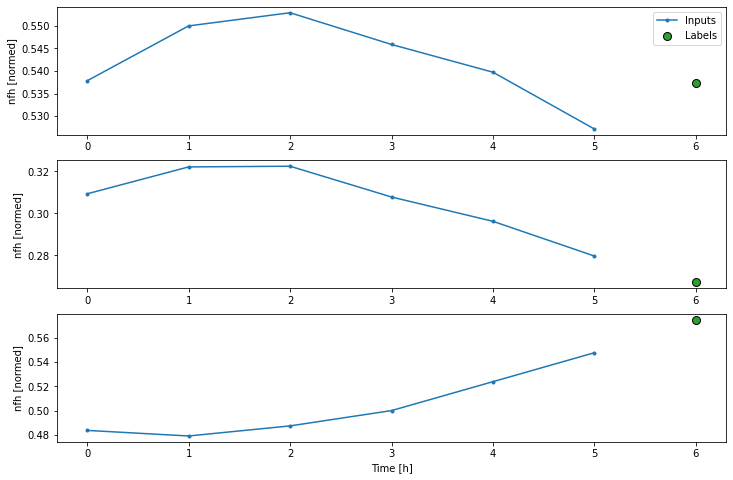

In [ ]:
w2.plot()

**Dataset Preparation for Model prediction**

**Creating windows for training ,testing and validation based on train ,test val dataset**

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 23), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 23)
Labels shape (batch, time, features): (32, 1, 1)


In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['nfh'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['nfh']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 23)
Labels shape (batch, time, features): (32, 1, 1)


## **Model Training/Evaluation (Time series forecasting for columns='nfh')**

### **Single Step Time Forecasting Models**

#### **BaseLine model**

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['nfh'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 5ms/step - loss: 2.7767e-04 - mean_absolute_error: 0.0133


In [ ]:
wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1,
    label_columns=['nfh'])

wide_window

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): ['nfh']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 23, 23)
Output shape: (32, 23, 1)


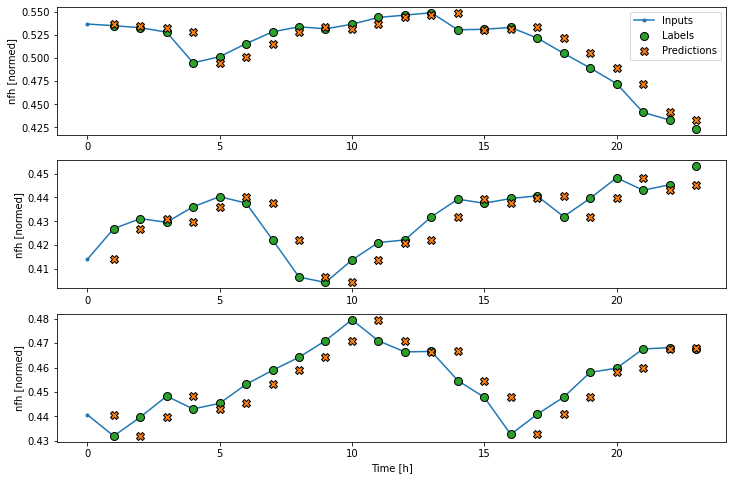

In [ ]:
wide_window.plot(baseline)

#### **Compile Function for CNN,Linear,RNN and Dense Model**

In [ ]:
MAX_EPOCHS = 20 # I have assigned low epochs here for avoiding time consumption of entire algorithm 
# Since this a regresion based dataset hence this would be the parameters required to perform the same
def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

### **Linear model**

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 23)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
8/8 [==============================] - 1s 25ms/step - loss: 27473.2852 - mean_absolute_error: 121.0426 - val_loss: 11020.9502 - val_mean_absolute_error: 87.4111
Epoch 2/20
8/8 [==============================] - 0s 11ms/step - loss: 23848.5117 - mean_absolute_error: 112.4389 - val_loss: 9397.8330 - val_mean_absolute_error: 80.7145
Epoch 3/20
8/8 [==============================] - 0s 18ms/step - loss: 20151.4785 - mean_absolute_error: 103.5674 - val_loss: 7975.1553 - val_mean_absolute_error: 74.3503
Epoch 4/20
8/8 [==============================] - 0s 15ms/step - loss: 17119.9707 - mean_absolute_error: 95.1864 - val_loss: 6688.3521 - val_mean_absolute_error: 68.0846
Epoch 5/20
8/8 [==============================] - 0s 11ms/step - loss: 14160.6348 - mean_absolute_error: 86.8961 - val_loss: 5572.1797 - val_mean_absolute_error: 62.1395
Epoch 6/20
8/8 [==============================] - 0s 19ms/step - loss: 11680.2773 - mean_absolute_error: 79.0761 - val_loss: 4598.2969 - val_mean_

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 23, 23)
Output shape: (32, 23, 1)


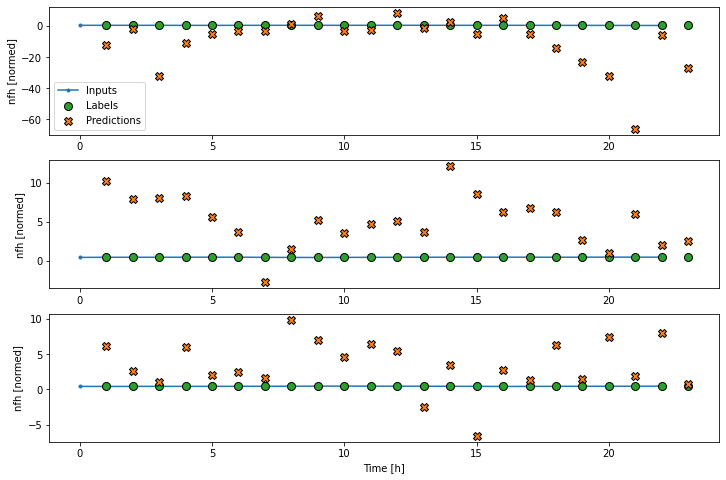

In [ ]:
wide_window.plot(linear)

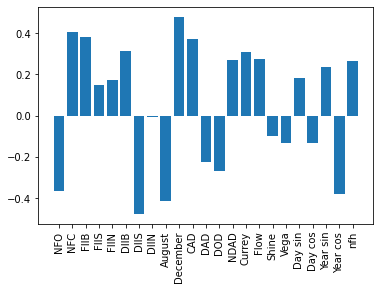

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

#### **Dense Model**

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
8/8 [==============================] - 1s 56ms/step - loss: 15077.7598 - mean_absolute_error: 77.1191 - val_loss: 679.9014 - val_mean_absolute_error: 21.7110
Epoch 2/20
8/8 [==============================] - 0s 25ms/step - loss: 1281.2236 - mean_absolute_error: 24.8919 - val_loss: 122.3170 - val_mean_absolute_error: 9.4879
Epoch 3/20
8/8 [==============================] - 0s 24ms/step - loss: 214.9352 - mean_absolute_error: 9.9521 - val_loss: 10.2243 - val_mean_absolute_error: 2.2510
Epoch 4/20
8/8 [==============================] - 0s 25ms/step - loss: 39.6571 - mean_absolute_error: 4.3833 - val_loss: 6.6635 - val_mean_absolute_error: 2.1540
Epoch 5/20
8/8 [==============================] - 0s 26ms/step - loss: 9.2951 - mean_absolute_error: 1.9730 - val_loss: 0.3757 - val_mean_absolute_error: 0.5861
Epoch 6/20
8/8 [==============================] - 0s 20ms/step - loss: 0.9380 - mean_absolute_error: 0.7195 - val_loss: 0.3402 - val_mean_absolute_error: 0.4747
Epoch 7/20
8/8 [

#### **Multi Step Dense Model**

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['nfh'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['nfh']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

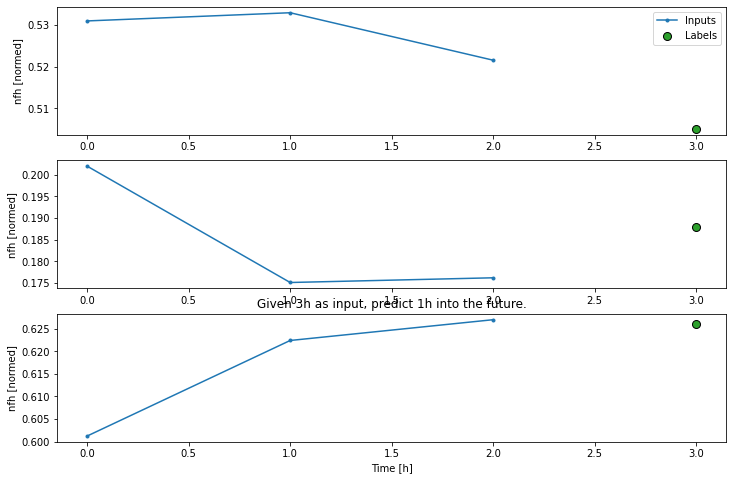

In [ ]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=320, activation='relu'),
    tf.keras.layers.Dense(units=640, activation='relu'),
    tf.keras.layers.Dense(units=960, activation='relu'),
    tf.keras.layers.Dense(units=1280, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 23)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 0s 10ms/step - loss: 0.7744 - mean_absolute_error: 0.7771


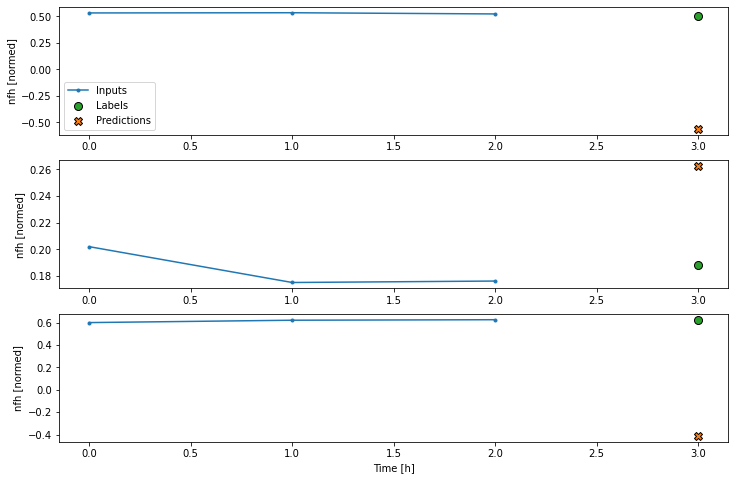

In [ ]:
conv_window.plot(multi_step_dense)

In [ ]:
print('Input shape:', wide_window.example[0].shape)


Input shape: (32, 23, 23)


#### **Convolutional Neural Network Model**

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=15000,kernel_size=(CONV_WIDTH,),activation='relu'),
    tf.keras.layers.Dense(units=12500, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 23)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 1s 254ms/step - loss: 16.8732 - mean_absolute_error: 3.1084


In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 23, 23)
Labels shape: (32, 23, 1)
Output shape: (32, 21, 1)


In [ ]:
LABEL_WIDTH = 23
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['nfh'])

wide_conv_window

Total window size: 26
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
Label column name(s): ['nfh']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 25, 23)
Labels shape: (32, 23, 1)
Output shape: (32, 23, 1)


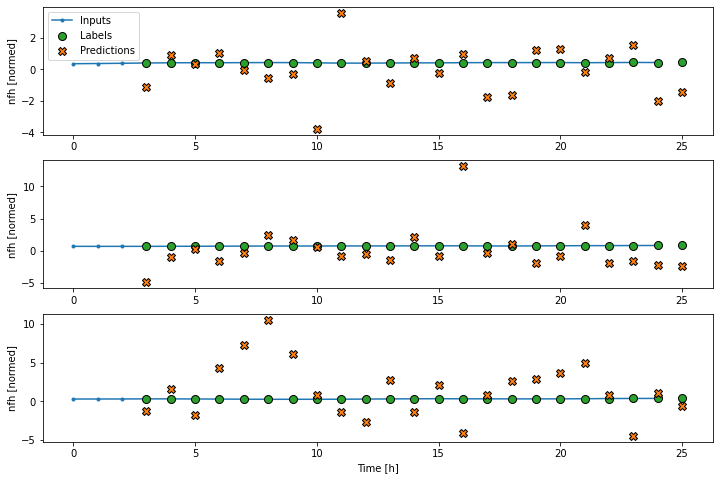

In [ ]:
wide_conv_window.plot(conv_model)

### **Recurrent Neural Network**

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(200, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 23, 23)
Output shape: (32, 23, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 123ms/step - loss: 0.2738 - mean_absolute_error: 0.5121


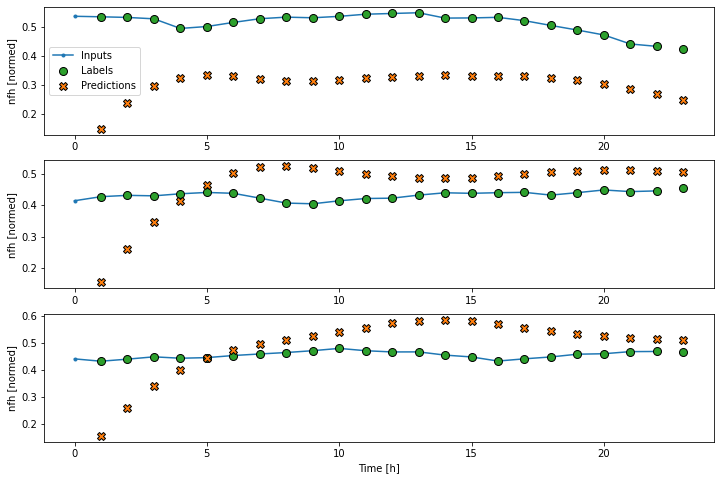

In [ ]:
wide_window.plot(lstm_model)

### **Model Performance Chart**

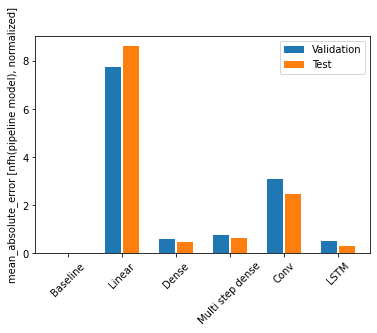

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [nfh(pipeline model), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0098
Linear      : 8.6077
Dense       : 0.4655
Multi step dense: 0.6227
Conv        : 2.4554
LSTM        : 0.2847


### **Multi Output Time Forecasting Models**

The models so far all predicted a single output feature, `nfh`, for a single time step.

All of these models can be converted to predict multiple features just by changing the number of units in the output layer and adjusting the training windows to include all features in the `labels`, 

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 23, 23)
Labels shape (batch, time, features): (32, 23, 23)


#### **Baseline Model**

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 7ms/step - loss: 47171.2773 - mean_absolute_error: 36.8011


In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])


In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 7ms/step - loss: 42653.0820 - mean_absolute_error: 46.0498


#### **RNN Model**

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

2/2 [==============================] - 0s 12ms/step - loss: 52832.7070 - mean_absolute_error: 40.2924

CPU times: user 8.56 s, sys: 654 ms, total: 9.22 s
Wall time: 9.17 s


### **Model Performance Chart**

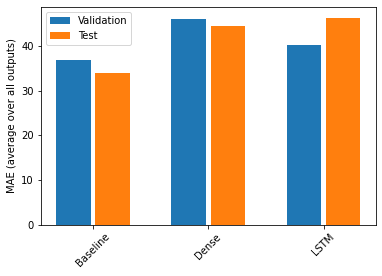

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 33.8677
Dense          : 44.3388
LSTM           : 46.3490


**Since the above models makes the time predictions under an hour basis for a single step , we can go with the multi step prediction which could performs with multiple steps**
The alogrithms are 

**1. Single shot predictions where the entire time series is predicted at once.**

**2. Autoregressive predictions where the model only makes single step predictions and its output is fed back as its input.**

**Multi Step models**

Total window size: 46
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Label column name(s): None

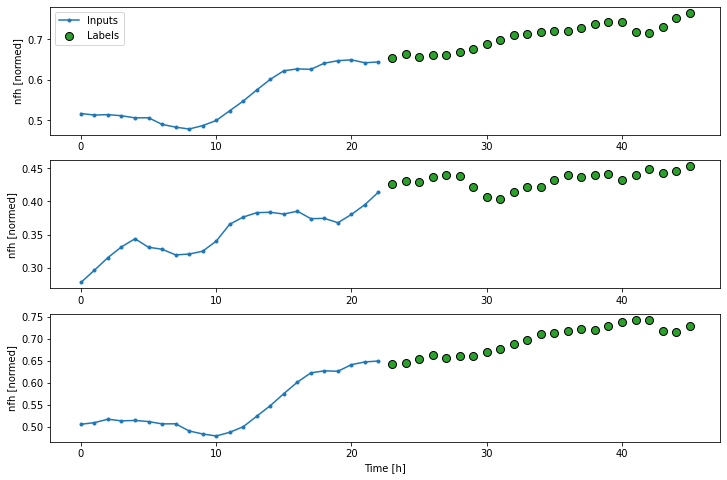

In [ ]:
OUT_STEPS = 23
multi_window = WindowGenerator(input_width=23,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

**Multi Step Baseline Model**

1/1 [==============================] - 0s 171ms/step - loss: 92115.5000 - mean_absolute_error: 51.7965


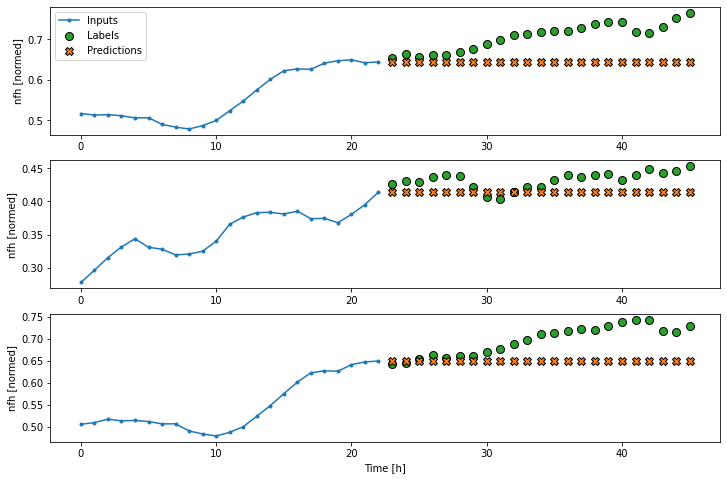

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

1/1 [==============================] - 0s 156ms/step - loss: 118817.8828 - mean_absolute_error: 62.6965


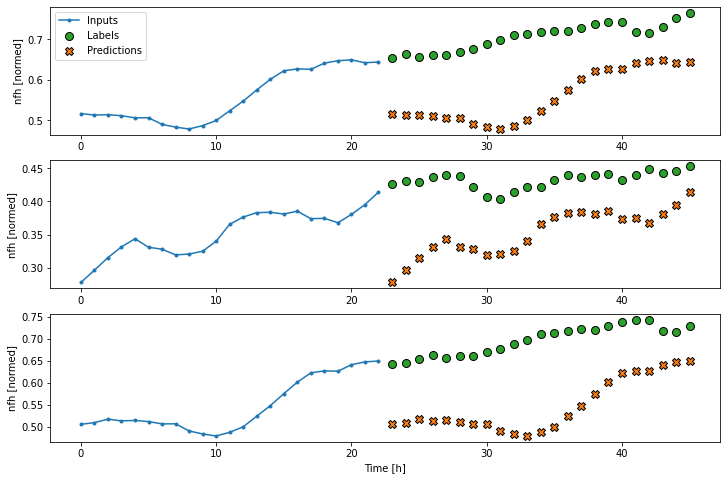

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### **Single Shot Models**

#### **Linear Model**

1/1 [==============================] - 0s 62ms/step - loss: 54209.1719 - mean_absolute_error: 39.7604


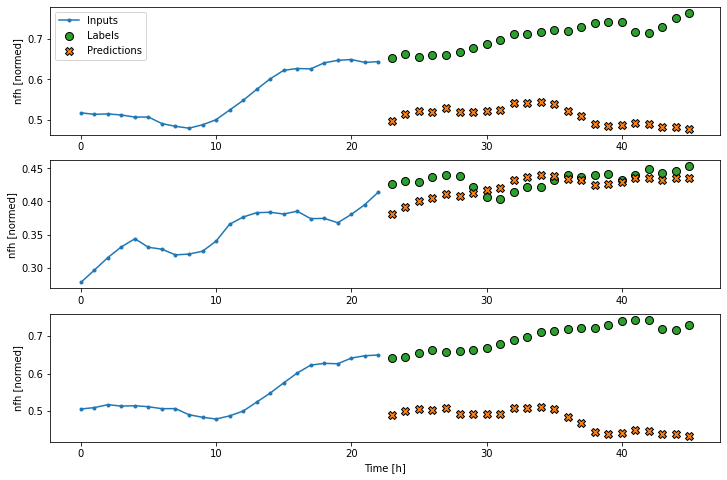

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### **Dense Model**

1/1 [==============================] - 0s 62ms/step - loss: 58817.8672 - mean_absolute_error: 44.9553


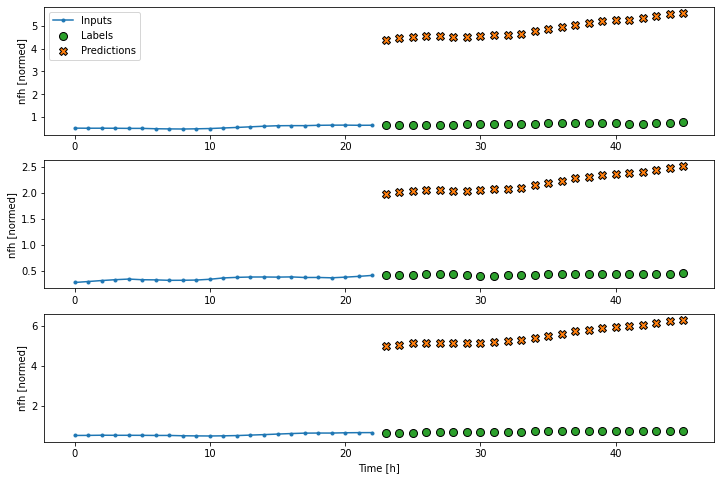

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

### **CNN Model**

1/1 [==============================] - 0s 59ms/step - loss: 55791.9219 - mean_absolute_error: 42.3730


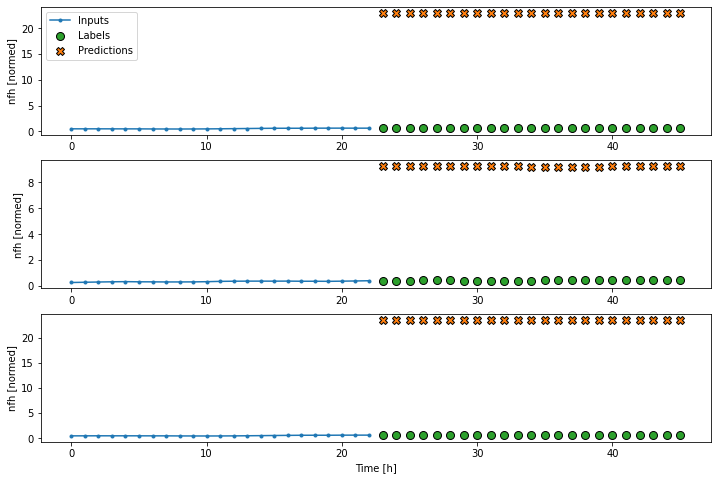

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#### **RNN Model**

1/1 [==============================] - 0s 66ms/step - loss: 54618.4922 - mean_absolute_error: 40.1034


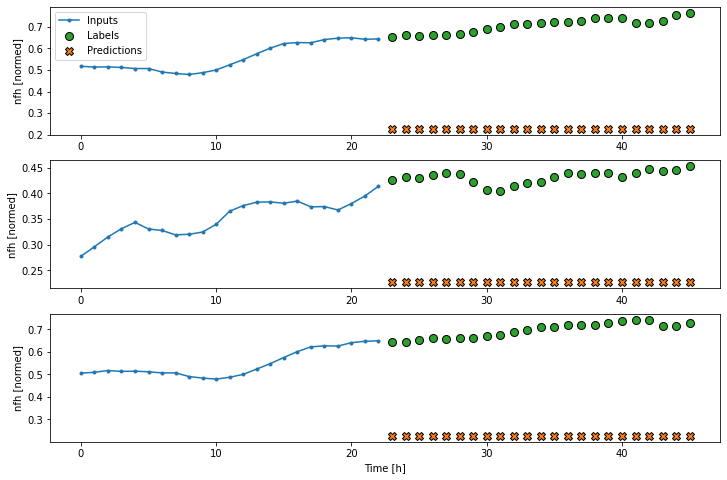

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### **Auto Regression models**

**RNN**

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 23])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 23, 23)


1/1 [==============================] - 0s 67ms/step - loss: 54622.2227 - mean_absolute_error: 40.2774


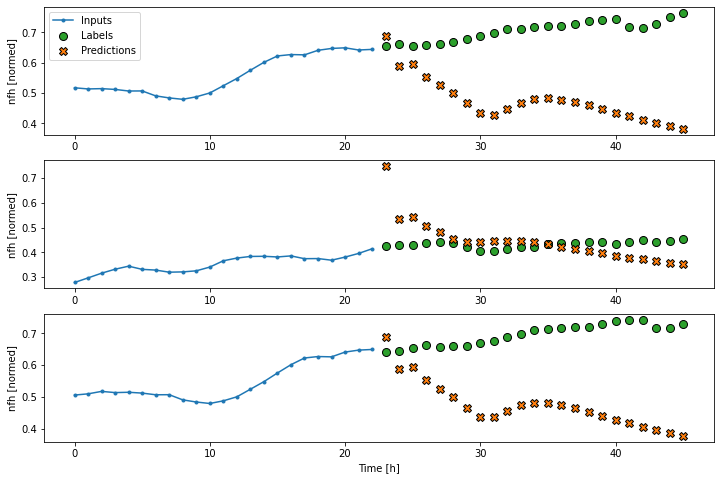

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### **Model Performance Chart**

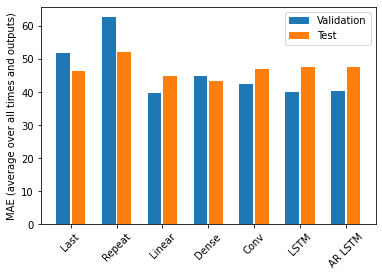

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 46.3492
Repeat  : 52.0163
Linear  : 44.8915
Dense   : 43.3852
Conv    : 46.9023
LSTM    : 47.4381
AR LSTM : 47.6048


**Thuis would be the results for forecasting the NFH column using the same**

### **NFL-column Time Series Forecasting**

**As discussed earlier since this is a pipeline model consideration hence we would assume that NFH column is present during NFL time series forecasting**

In [ ]:
train_df=train_df1.copy()
val_df=val_df1.copy()
test_df=test_df1.copy()
num_features = train_df.shape[1] 

In [ ]:
num_features

24

In [ ]:
train_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,nfh,nfl
0,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,0.537827,0.571552
1,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,0.549968,0.574100
2,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,0.552886,0.575098
3,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,0.545863,0.557377
4,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,0.539722,0.552135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.813531,0.801525,0.147839,0.079317,0.386803,0.250564,0.655676,-2372.54,0.091459,0.377544,-0.21,0.0692,-0.30,2.01,-0.1293,0.3506,-0.80,-0.810001,-5.026111e-12,1.0,0.130923,0.991393,0.804795,0.809794
244,0.815255,0.817144,0.099136,0.069663,0.308742,0.224393,0.648190,-2610.13,0.063464,0.589626,-0.27,-0.5692,0.65,2.09,0.1693,-0.0772,-0.45,2.520000,-6.682411e-12,1.0,0.181890,0.983319,0.814407,0.819800
245,0.833183,0.835068,0.095019,0.104560,0.239417,0.318142,0.620449,-1334.5,0.087960,0.397242,0.83,0.1700,2.18,1.02,-0.2105,0.2796,0.02,-0.750000,-2.383872e-12,1.0,0.198778,0.980044,0.829200,0.836747
246,0.840029,0.848669,0.107597,0.098429,0.274724,0.337656,0.781886,-2370.17,0.052965,0.654629,-0.52,-0.1018,-1.01,0.57,-0.1940,-0.0230,0.06,-1.120001,-1.263725e-11,1.0,0.215608,0.976480,0.842815,0.847269


**Window Generator**

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['nfl'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['nfl']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['nfl'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['nfl']

**Splitting Window**

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]).astype(np.float32),
                           np.array(train_df[100:100+w2.total_window_size]).astype(np.float32),
                           np.array(train_df[200:200+w2.total_window_size]).astype(np.float32)])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 24)
Inputs shape: (3, 6, 24)
labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

In [ ]:
w2.example

(<tf.Tensor: shape=(3, 6, 24), dtype=float32, numpy=
 array([[[ 5.50681829e-01,  5.61093152e-01,  2.50967452e-03,
           0.00000000e+00,  2.42583781e-01,  1.35338187e-01,
           1.75187483e-01,  6.39500008e+01,  1.18131086e-01,
           1.11621797e-01, -9.99999978e-03,  3.97000015e-01,
          -9.80000019e-01,  7.20000029e-01, -5.20000011e-02,
           3.99000011e-02, -1.00000001e-01, -1.30999947e+00,
          -3.37180370e-12,  1.00000000e+00,  1.50518613e-02,
           9.99886692e-01,  5.37826896e-01,  5.71552336e-01],
         [ 5.60136974e-01,  5.65259576e-01,  2.80253664e-02,
           1.95133202e-02,  2.58090734e-01,  6.99386075e-02,
           2.20660731e-01, -1.02919995e+03,  7.30161741e-02,
           4.34011817e-01, -2.30000004e-01, -5.09999990e-01,
          -1.33000004e+00,  4.60000008e-01,  4.42999989e-01,
           5.64800024e-01,  7.99999982e-02,  1.55000019e+00,
           9.26734926e-13,  1.00000000e+00,  3.22496146e-02,
           9.99479830e-01,  5.4

In [ ]:
def plot(self, model=None, plot_col='nfl', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

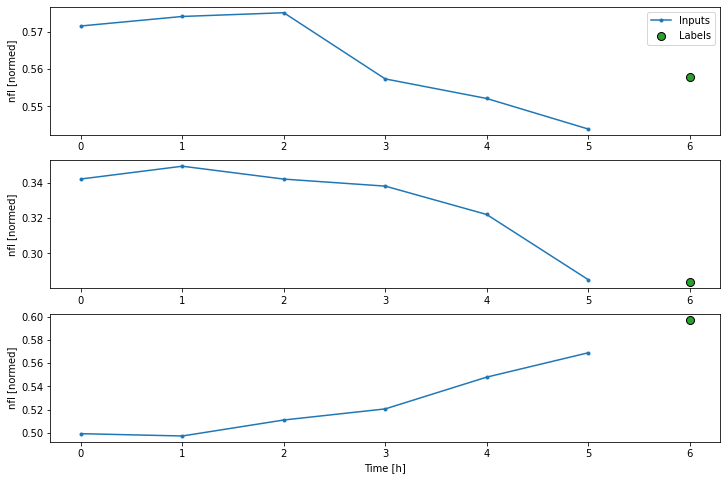

In [ ]:
w2.plot()

**Creating Dataset for Model**

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

**Creating windows for training ,testing and validation based on train ,test val dataset**

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 24), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 24)
Labels shape (batch, time, features): (32, 1, 1)


## **Model Training/Evaluation (Time series forecasting for columns='nfl')**

### **Single Step Time Forecasting Models**

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['nfl'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['nfl']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 24)
Labels shape (batch, time, features): (32, 1, 1)


#### **BaseLine Model**

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['nfl'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 7ms/step - loss: 3.8582e-04 - mean_absolute_error: 0.0153


In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['nfl'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['nfl']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 24)
Output shape: (32, 24, 1)


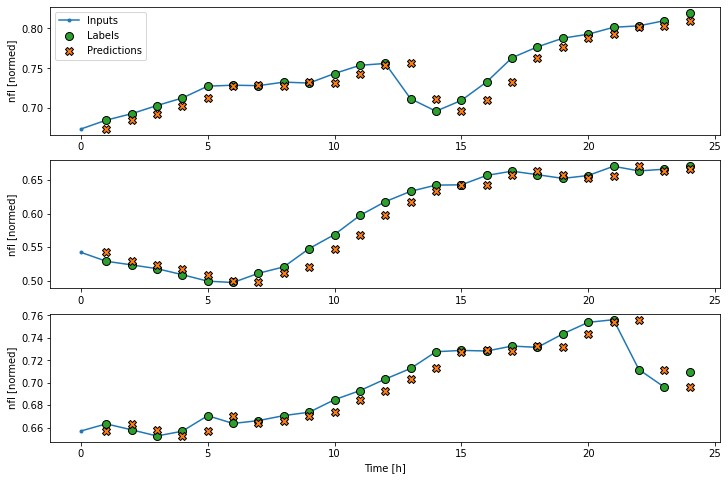

In [ ]:
wide_window.plot(baseline)

**Since we had already defined the Compile function before hence we shall just call the same when executing the algorithms**

#### **Linear Model**

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 24)
Output shape: (32, 24, 1)


In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
8/8 [==============================] - 1s 26ms/step - loss: 493196.3750 - mean_absolute_error: 514.0181 - val_loss: 212022.2031 - val_mean_absolute_error: 383.5614
Epoch 2/20
8/8 [==============================] - 0s 15ms/step - loss: 476394.6875 - mean_absolute_error: 504.8108 - val_loss: 204370.4062 - val_mean_absolute_error: 376.5750
Epoch 3/20
8/8 [==============================] - 0s 12ms/step - loss: 458801.1562 - mean_absolute_error: 495.5642 - val_loss: 197201.3750 - val_mean_absolute_error: 369.9096
Epoch 4/20
8/8 [==============================] - 0s 13ms/step - loss: 442511.5000 - mean_absolute_error: 486.7714 - val_loss: 190255.4531 - val_mean_absolute_error: 363.3349
Epoch 5/20
8/8 [==============================] - 0s 13ms/step - loss: 427024.4688 - mean_absolute_error: 477.9358 - val_loss: 183257.5469 - val_mean_absolute_error: 356.5893
Epoch 6/20
8/8 [==============================] - 0s 11ms/step - loss: 411796.8438 - mean_absolute_error: 469.2751 - val_loss

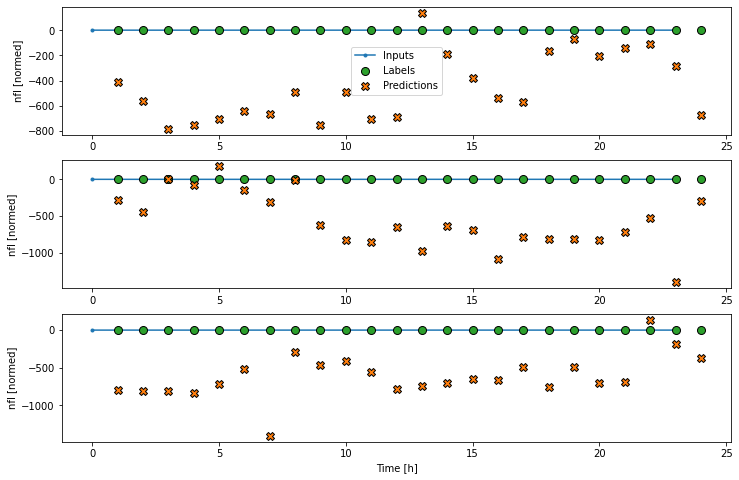

In [ ]:
wide_window.plot(linear)

#### **Dense Model**

In [ ]:
tot=24
num_features=tot-1
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
8/8 [==============================] - 2s 51ms/step - loss: 11640.2285 - mean_absolute_error: 70.4525 - val_loss: 420.2061 - val_mean_absolute_error: 16.7903
Epoch 2/20
8/8 [==============================] - 0s 24ms/step - loss: 1190.4602 - mean_absolute_error: 24.7551 - val_loss: 123.2185 - val_mean_absolute_error: 9.0823
Epoch 3/20
8/8 [==============================] - 0s 23ms/step - loss: 368.8933 - mean_absolute_error: 13.7289 - val_loss: 26.3860 - val_mean_absolute_error: 4.4655
Epoch 4/20
8/8 [==============================] - 0s 18ms/step - loss: 127.0485 - mean_absolute_error: 7.8306 - val_loss: 3.2080 - val_mean_absolute_error: 1.4467
Epoch 5/20
8/8 [==============================] - 0s 20ms/step - loss: 23.3612 - mean_absolute_error: 3.4148 - val_loss: 13.5862 - val_mean_absolute_error: 3.0077
Epoch 6/20
3/3 [==============================] - 0s 6ms/step - loss: 14.3619 - mean_absolute_error: 2.5360


#### **Multi Step Dense Model**

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['nfl'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['nfl']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

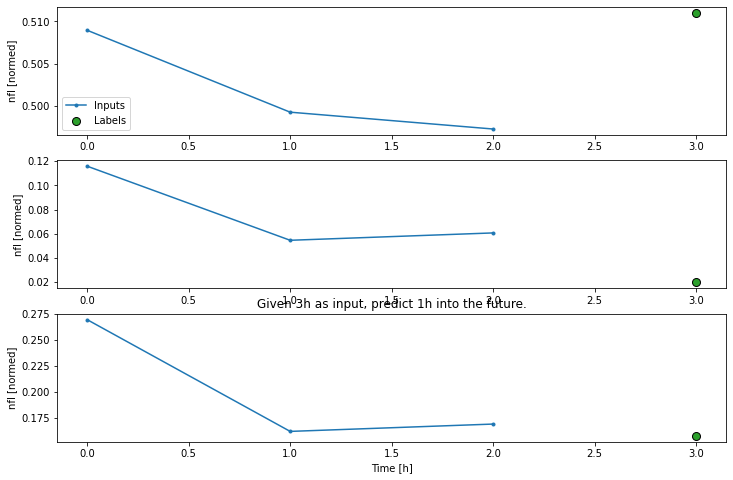

In [ ]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=320, activation='relu'),
    tf.keras.layers.Dense(units=640, activation='relu'),
    tf.keras.layers.Dense(units=960, activation='relu'),
    tf.keras.layers.Dense(units=1280, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 24)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 0s 9ms/step - loss: 0.3526 - mean_absolute_error: 0.5299


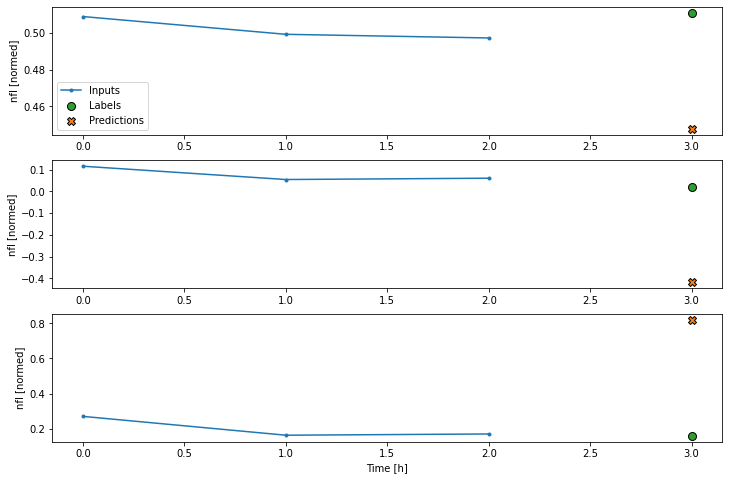

In [ ]:
conv_window.plot(multi_step_dense)

In [ ]:
print('Input shape:', wide_window.example[0].shape)

Input shape: (32, 24, 24)


#### **Convolutional Neural Network Model**

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=15000,kernel_size=(CONV_WIDTH,),activation='relu'),
    tf.keras.layers.Dense(units=12500, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 24)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 1s 308ms/step - loss: 16.4566 - mean_absolute_error: 2.9515


In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 24)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['nfl'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['nfl']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 24)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


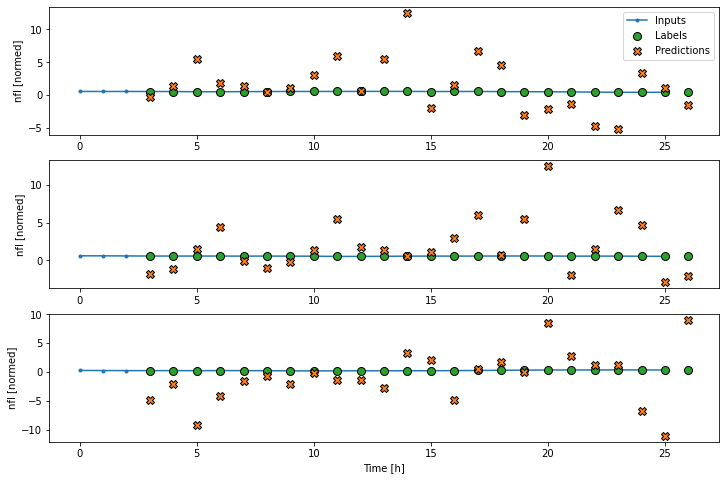

In [ ]:
wide_conv_window.plot(conv_model)

#### **Recurrent neural network Model**

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(200, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 24)
Output shape: (32, 24, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 34ms/step - loss: 0.2395 - mean_absolute_error: 0.4781


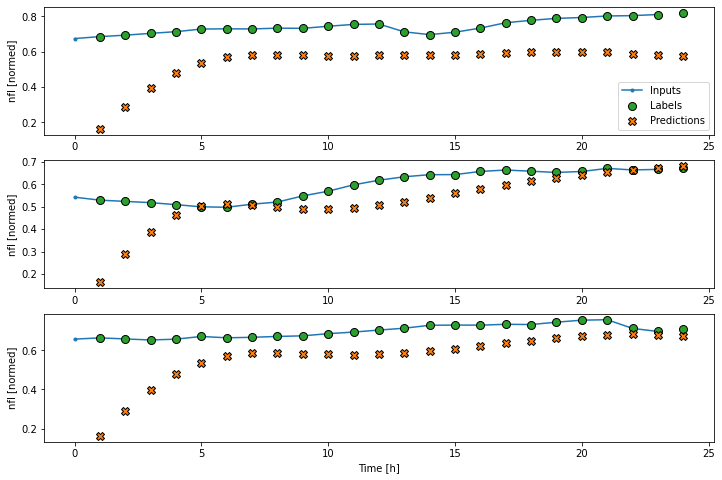

In [ ]:
wide_window.plot(lstm_model)

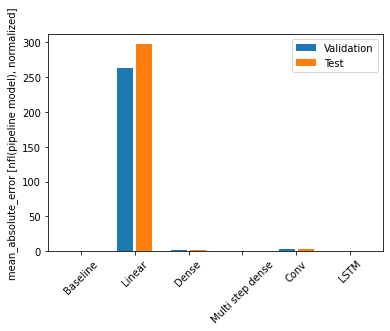

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [nfl(pipeline model), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0112
Linear      : 296.9223
Dense       : 2.1412
Multi step dense: 0.4224
Conv        : 3.1707
LSTM        : 0.2696


### **Multi-output Time Forecasting models**

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 24)
Labels shape (batch, time, features): (32, 24, 24)


#### **BaseLine Model**

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 5ms/step - loss: 45273.2773 - mean_absolute_error: 35.3474


In [ ]:
num_features = train_df.shape[1] 

dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])


In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 7ms/step - loss: 39658.9766 - mean_absolute_error: 37.7247


#### **RNN Model**

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

2/2 [==============================] - 0s 9ms/step - loss: 50482.9531 - mean_absolute_error: 38.6289

CPU times: user 9.47 s, sys: 462 ms, total: 9.93 s
Wall time: 9.62 s


### **Model Performance Chart**

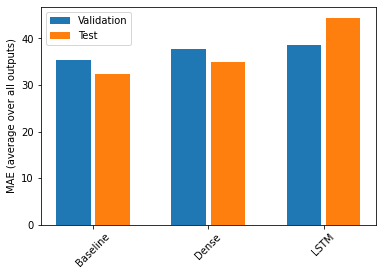

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 32.4232
Dense          : 35.0455
LSTM           : 44.5120


### **Multi-step models**

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

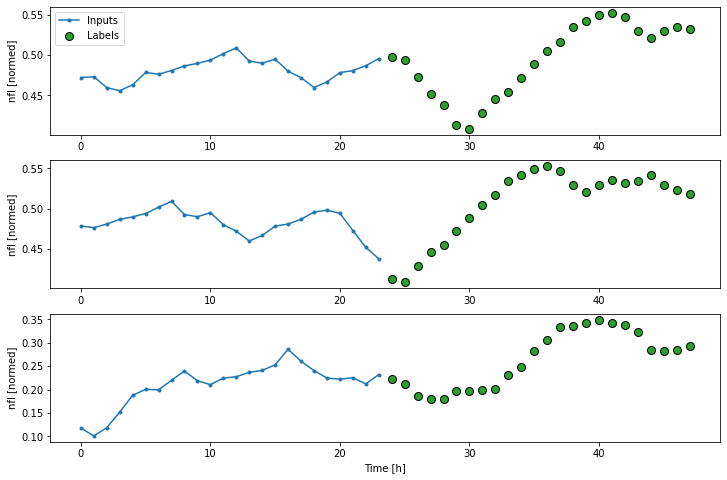

In [ ]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

#### **Baseline Model**

1/1 [==============================] - 0s 146ms/step - loss: 86724.0078 - mean_absolute_error: 49.1897


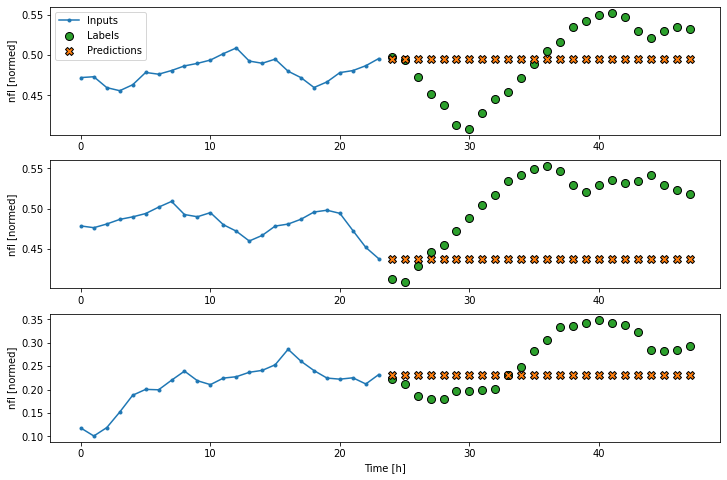

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

1/1 [==============================] - 0s 140ms/step - loss: 119136.3984 - mean_absolute_error: 58.7423


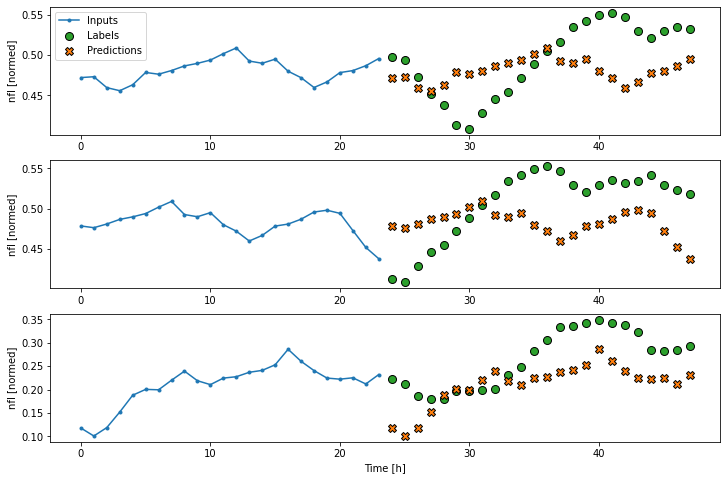

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### **Single-shot models**

#### **Multi Linear Model**

1/1 [==============================] - 0s 59ms/step - loss: 53243.0977 - mean_absolute_error: 38.7082


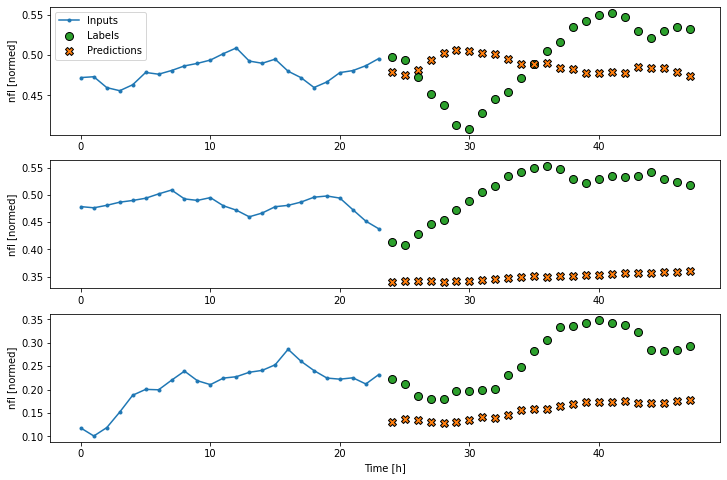

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### **Dense Model**

1/1 [==============================] - 0s 62ms/step - loss: 57517.7227 - mean_absolute_error: 42.4133


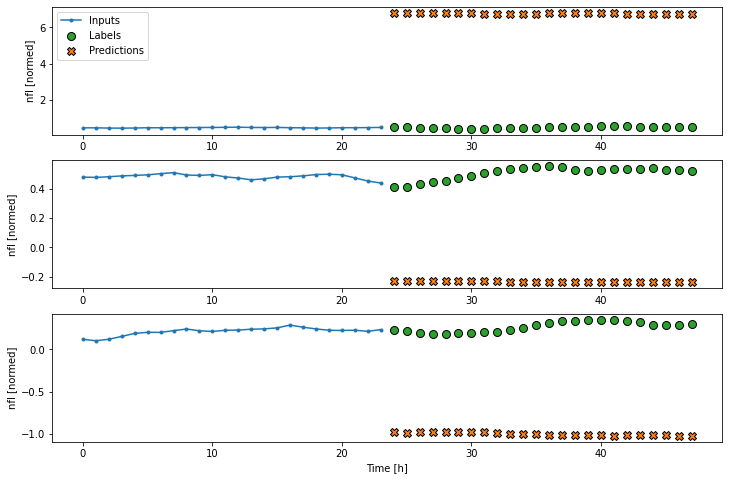

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

#### **CNN Model**

1/1 [==============================] - 0s 59ms/step - loss: 56966.3555 - mean_absolute_error: 41.7756


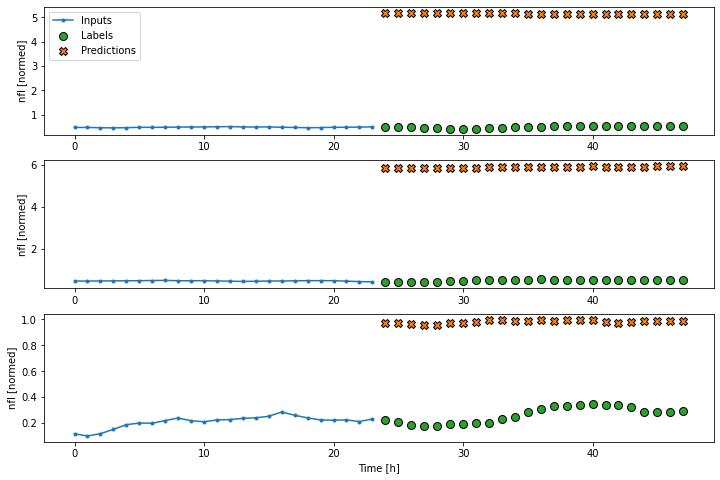

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#### **RNN Model**

1/1 [==============================] - 0s 73ms/step - loss: 53337.8477 - mean_absolute_error: 38.7921


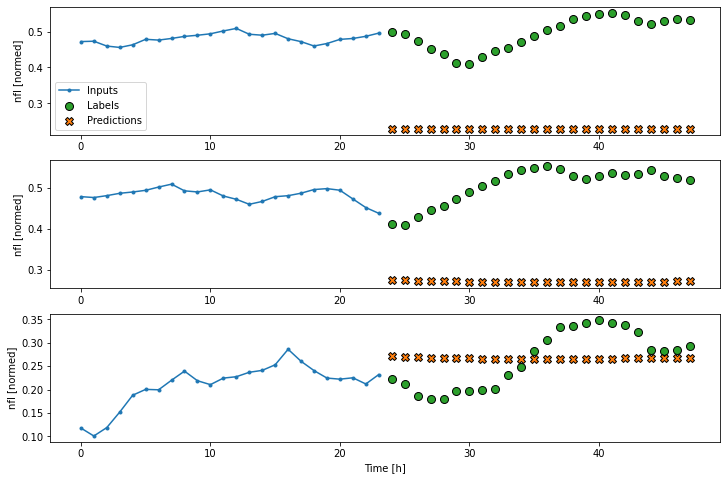

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### **Autoregressive model**

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 24])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 24)


1/1 [==============================] - 0s 66ms/step - loss: 53347.0781 - mean_absolute_error: 38.9507


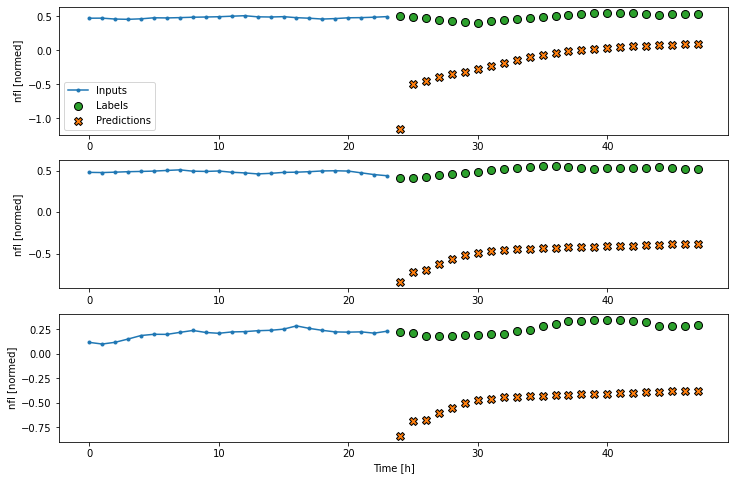

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### **Model Performance Chart**



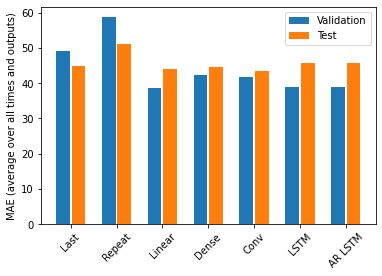

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 44.9063
Repeat  : 51.1788
Linear  : 44.0772
Dense   : 44.6556
Conv    : 43.3083
LSTM    : 45.6454
AR LSTM : 45.7824


**This would be the results for forecasting the NFL column based on other columns including NFH column**

**Conclusion of Dependent Model Analysis: Here after scaling down the values and performing the same analysis on the dataset we can see that the mae rate has decreased to a level and almost all algorithms perform well compared to the results of the same analysis performed under Time Series Forecatsing of NFH and NFL without scaling.**


## **Independent Model Algorithm**

### **NFH-column Time Series Forecasting**

In [ ]:
train_df=train_df1.drop(columns=['nfl'])
test_df=test_df1.drop(columns=['nfl'])
val_df=val_df1.drop(columns=['nfl'])
num_features = train_df.shape[1] 

In [ ]:
num_features

23

In [ ]:
train_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,nfh
0,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,0.537827
1,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,0.549968
2,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,0.552886
3,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,0.545863
4,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,0.539722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.813531,0.801525,0.147839,0.079317,0.386803,0.250564,0.655676,-2372.54,0.091459,0.377544,-0.21,0.0692,-0.30,2.01,-0.1293,0.3506,-0.80,-0.810001,-5.026111e-12,1.0,0.130923,0.991393,0.804795
244,0.815255,0.817144,0.099136,0.069663,0.308742,0.224393,0.648190,-2610.13,0.063464,0.589626,-0.27,-0.5692,0.65,2.09,0.1693,-0.0772,-0.45,2.520000,-6.682411e-12,1.0,0.181890,0.983319,0.814407
245,0.833183,0.835068,0.095019,0.104560,0.239417,0.318142,0.620449,-1334.5,0.087960,0.397242,0.83,0.1700,2.18,1.02,-0.2105,0.2796,0.02,-0.750000,-2.383872e-12,1.0,0.198778,0.980044,0.829200
246,0.840029,0.848669,0.107597,0.098429,0.274724,0.337656,0.781886,-2370.17,0.052965,0.654629,-0.52,-0.1018,-1.01,0.57,-0.1940,-0.0230,0.06,-1.120001,-1.263725e-11,1.0,0.215608,0.976480,0.842815


**Window generator**

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=23, label_width=1, shift=23,
                     label_columns=['nfh'])
w1

Total window size: 46
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [45]
Label column name(s): ['nfh']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['nfh'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['nfh']

**Splitting Window**

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]).astype(np.float32),
                           np.array(train_df[100:100+w2.total_window_size]).astype(np.float32),
                           np.array(train_df[200:200+w2.total_window_size]).astype(np.float32)])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 23)
Inputs shape: (3, 6, 23)
labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

**Data Visualization of Window Plot**

In [ ]:
def plot(self, model=None, plot_col='nfh', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

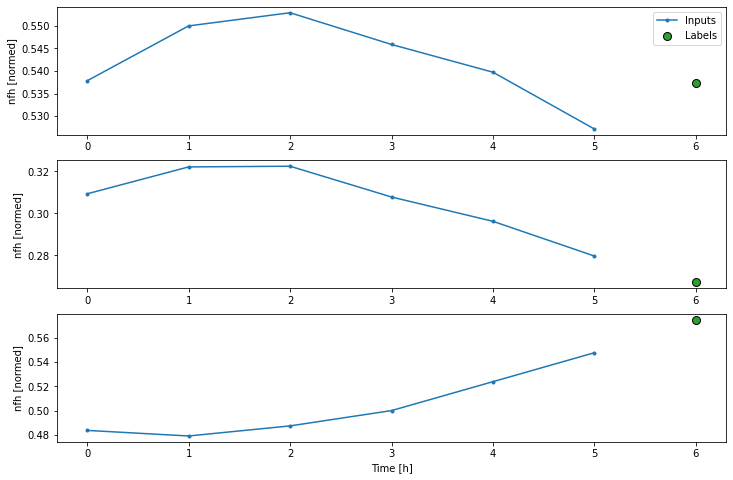

In [ ]:
w2.plot()

**Dataset Preparation for Model prediction**

**Creating windows for training ,testing and validation based on train ,test val dataset**

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 23), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 23)
Labels shape (batch, time, features): (32, 1, 1)


In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['nfh'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['nfh']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 23)
Labels shape (batch, time, features): (32, 1, 1)


## **Model Training/Evaluation (Time series forecasting for columns='nfh')**

### **Single Step Time Forecasting Models**

#### **BaseLine model**

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['nfh'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 5ms/step - loss: 2.7767e-04 - mean_absolute_error: 0.0133


In [ ]:
wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1,
    label_columns=['nfh'])

wide_window

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): ['nfh']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 23, 23)
Output shape: (32, 23, 1)


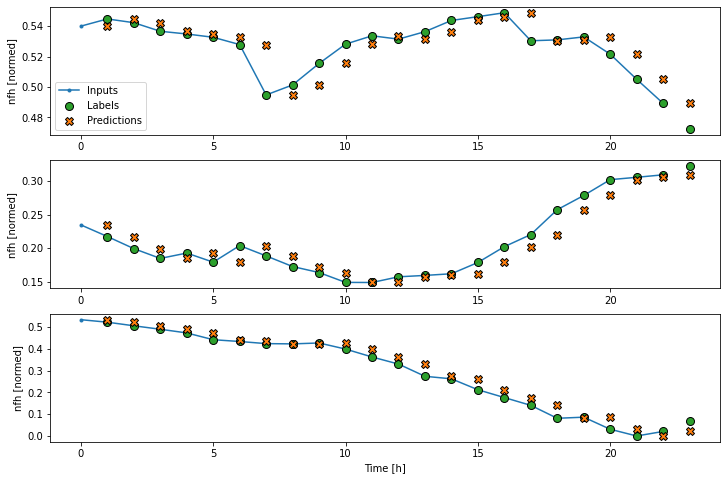

In [ ]:
wide_window.plot(baseline)

#### **Compile Function for CNN,Linear,RNN and Dense Model**

In [ ]:
MAX_EPOCHS = 20 #I have assigned low epochs here for avoiding time consumption of entire algorithm 
# Since this a regresion based dataset hence this would be the parameters required to perform the same
def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

#### **Linear model**

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 23)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
8/8 [==============================] - 1s 32ms/step - loss: 146241.0625 - mean_absolute_error: 279.5611 - val_loss: 61833.9648 - val_mean_absolute_error: 207.1323
Epoch 2/20
8/8 [==============================] - 0s 12ms/step - loss: 136482.7031 - mean_absolute_error: 270.3722 - val_loss: 57718.8438 - val_mean_absolute_error: 200.1194
Epoch 3/20
8/8 [==============================] - 0s 19ms/step - loss: 127638.3125 - mean_absolute_error: 261.1653 - val_loss: 53679.4805 - val_mean_absolute_error: 192.9881
Epoch 4/20
8/8 [==============================] - 0s 19ms/step - loss: 118719.6875 - mean_absolute_error: 251.8309 - val_loss: 49879.4805 - val_mean_absolute_error: 186.0300
Epoch 5/20
8/8 [==============================] - 0s 18ms/step - loss: 110383.5781 - mean_absolute_error: 242.8252 - val_loss: 46280.6289 - val_mean_absolute_error: 179.1916
Epoch 6/20
8/8 [==============================] - 0s 18ms/step - loss: 102105.5781 - mean_absolute_error: 233.7198 - val_loss: 429

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 23, 23)
Output shape: (32, 23, 1)


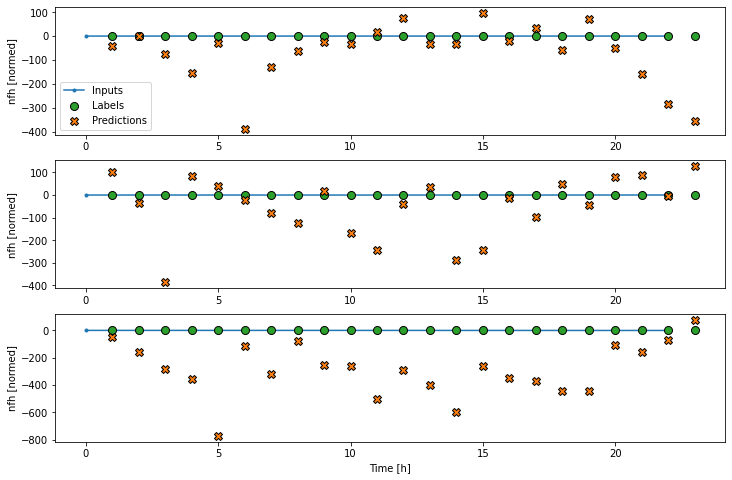

In [ ]:
wide_window.plot(linear)

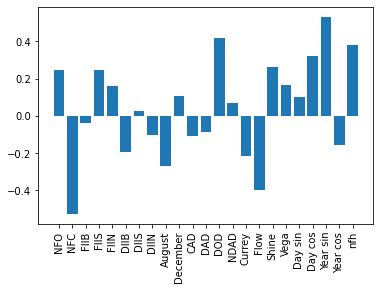

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

#### **Dense Model**

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
8/8 [==============================] - 1s 54ms/step - loss: 21152.0684 - mean_absolute_error: 89.1732 - val_loss: 897.0768 - val_mean_absolute_error: 24.2409
Epoch 2/20
8/8 [==============================] - 0s 27ms/step - loss: 3607.9246 - mean_absolute_error: 35.9032 - val_loss: 36.9227 - val_mean_absolute_error: 5.0511
Epoch 3/20
8/8 [==============================] - 0s 23ms/step - loss: 671.5553 - mean_absolute_error: 15.3151 - val_loss: 45.4545 - val_mean_absolute_error: 4.8780
Epoch 4/20
8/8 [==============================] - 0s 25ms/step - loss: 77.2808 - mean_absolute_error: 6.0809 - val_loss: 14.3329 - val_mean_absolute_error: 3.1740
Epoch 5/20
8/8 [==============================] - 0s 18ms/step - loss: 34.6234 - mean_absolute_error: 3.8835 - val_loss: 19.9418 - val_mean_absolute_error: 3.9174
Epoch 6/20
8/8 [==============================] - 0s 25ms/step - loss: 18.4741 - mean_absolute_error: 2.7996 - val_loss: 3.8861 - val_mean_absolute_error: 1.6537
Epoch 7/20
8

#### **Multi Step Dense Model**

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['nfh'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['nfh']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

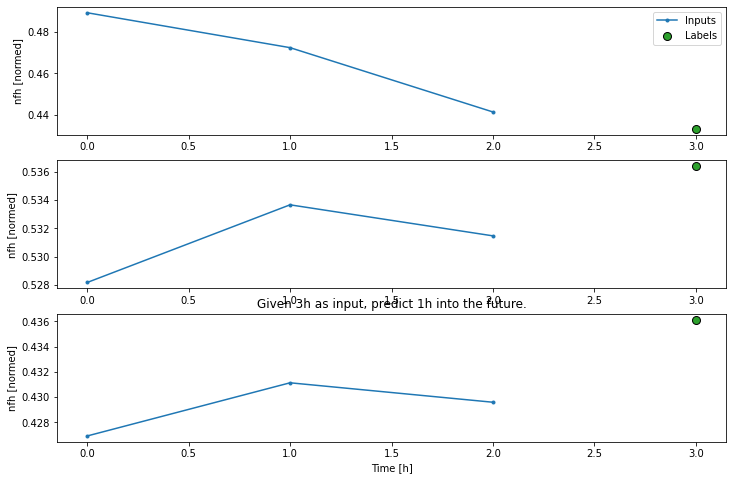

In [ ]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=320, activation='relu'),
    tf.keras.layers.Dense(units=640, activation='relu'),
    tf.keras.layers.Dense(units=960, activation='relu'),
    tf.keras.layers.Dense(units=1280, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 23)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 0s 8ms/step - loss: 0.5118 - mean_absolute_error: 0.6275


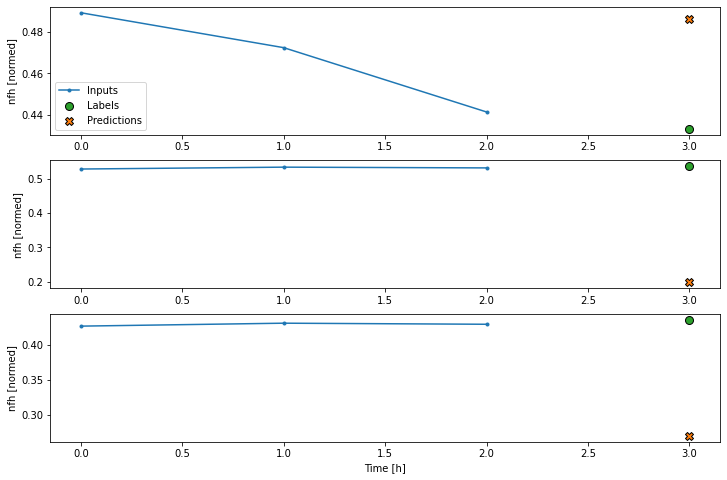

In [ ]:
conv_window.plot(multi_step_dense)

In [ ]:
print('Input shape:', wide_window.example[0].shape)

Input shape: (32, 23, 23)


#### **Convolutional Neural Network Model**

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=15000,kernel_size=(CONV_WIDTH,),activation='relu'),
    tf.keras.layers.Dense(units=12500, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 23)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 1s 281ms/step - loss: 161.9409 - mean_absolute_error: 9.0469


In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 23, 23)
Labels shape: (32, 23, 1)
Output shape: (32, 21, 1)


In [ ]:
LABEL_WIDTH = 23
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['nfh'])

wide_conv_window

Total window size: 26
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
Label column name(s): ['nfh']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 25, 23)
Labels shape: (32, 23, 1)
Output shape: (32, 23, 1)


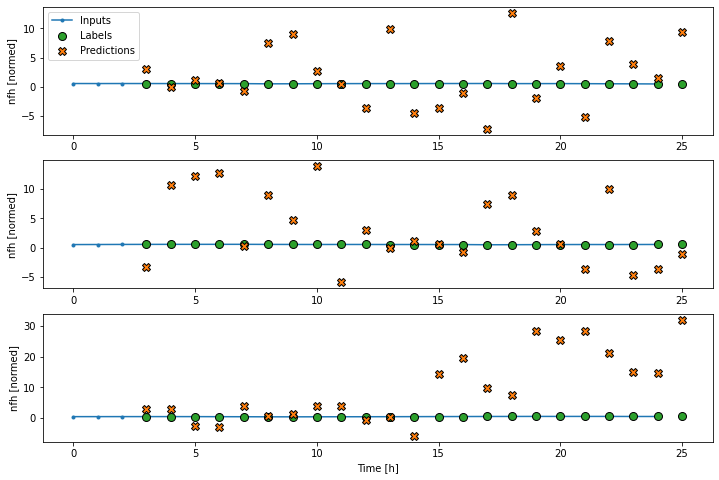

In [ ]:
wide_conv_window.plot(conv_model)

#### **Recurrent Neural Network**

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(200, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 23, 23)
Output shape: (32, 23, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 39ms/step - loss: 0.2463 - mean_absolute_error: 0.4837


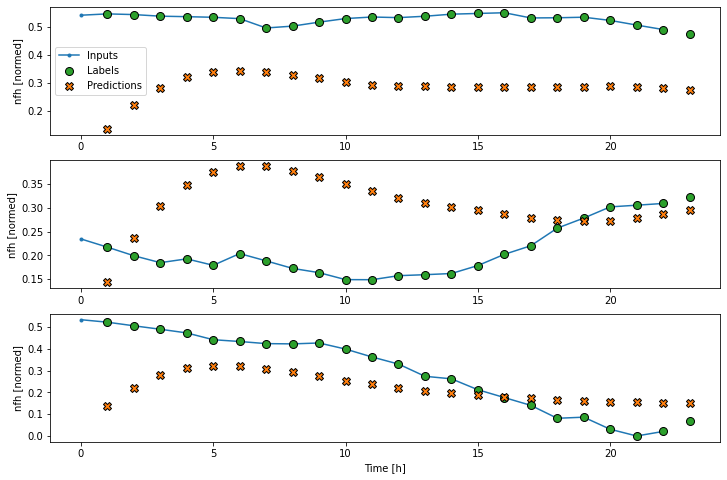

In [ ]:
wide_window.plot(lstm_model)

### **Model Performance Chart**

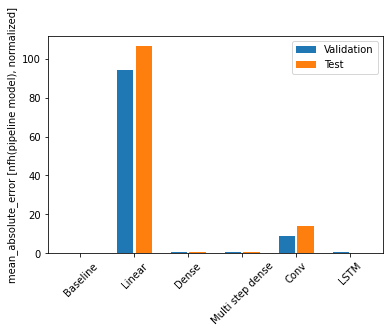

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [nfh(pipeline model), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0098
Linear      : 106.4222
Dense       : 0.5267
Multi step dense: 0.4435
Conv        : 14.2385
LSTM        : 0.2766


### **Multi Output Time Forecasting Models**

The models so far all predicted a single output feature, `nfh`, for a single time step.

All of these models can be converted to predict multiple features just by changing the number of units in the output layer and adjusting the training windows to include all features in the `labels`, 

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 23, 23)
Labels shape (batch, time, features): (32, 23, 23)


#### **Baseline Model**

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 7ms/step - loss: 47171.2695 - mean_absolute_error: 36.8011


In [ ]:
num_features = train_df.shape[1] 
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])


In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 6ms/step - loss: 41625.8086 - mean_absolute_error: 38.5520


#### **RNN Model**

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)


2/2 [==============================] - 0s 9ms/step - loss: 52840.6758 - mean_absolute_error: 40.3105
CPU times: user 9.46 s, sys: 439 ms, total: 9.9 s
Wall time: 9.42 s


### **Model Performance Chart**

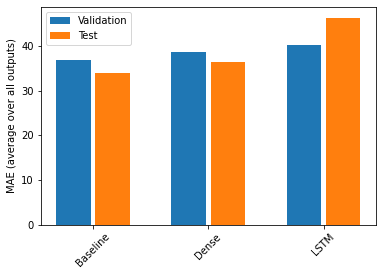

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 33.8677
Dense          : 36.3483
LSTM           : 46.3833


**Since the above models makes the time predictions under an hour basis for a single step , we can go with the multi step prediction which could performs with multiple steps**
The alogrithms are 

**1. Single shot predictions where the entire time series is predicted at once.**

**2. Autoregressive predictions where the model only makes single step predictions and its output is fed back as its input.**

### **Multi Step models**

Total window size: 46
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Label column name(s): None

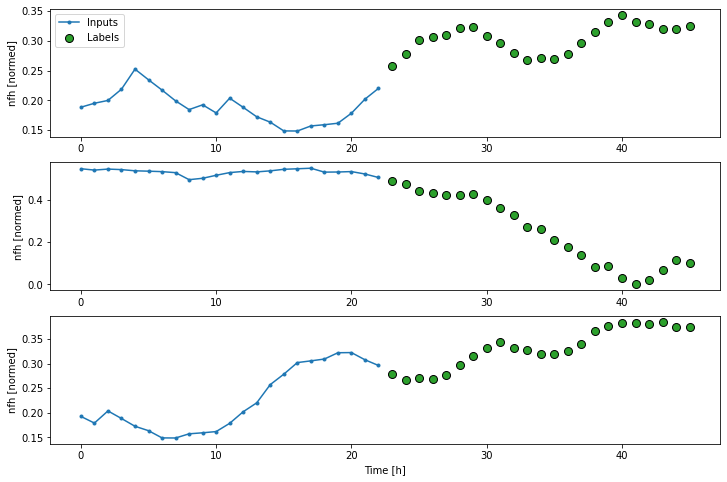

In [ ]:
OUT_STEPS = 23
multi_window = WindowGenerator(input_width=23,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

#### **Multi Step Baseline Model**

1/1 [==============================] - 0s 174ms/step - loss: 92115.5000 - mean_absolute_error: 51.7965


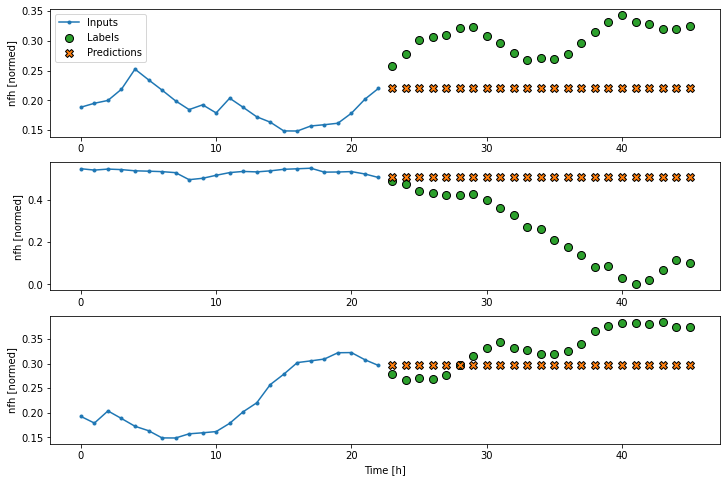

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

In [ ]:
multi_window.val

<MapDataset shapes: ((None, 23, 23), (None, 23, 23)), types: (tf.float32, tf.float32)>

1/1 [==============================] - 0s 150ms/step - loss: 118817.8828 - mean_absolute_error: 62.6965


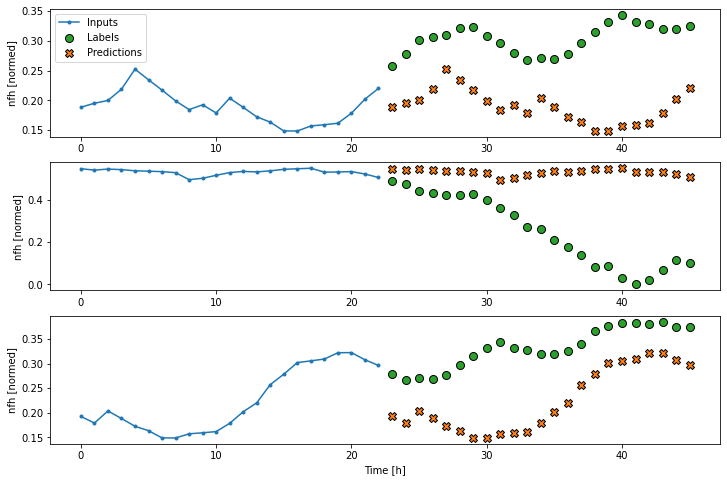

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### **Single Shot Models**

#### **Linear Model**

1/1 [==============================] - 0s 62ms/step - loss: 54229.4727 - mean_absolute_error: 39.7797


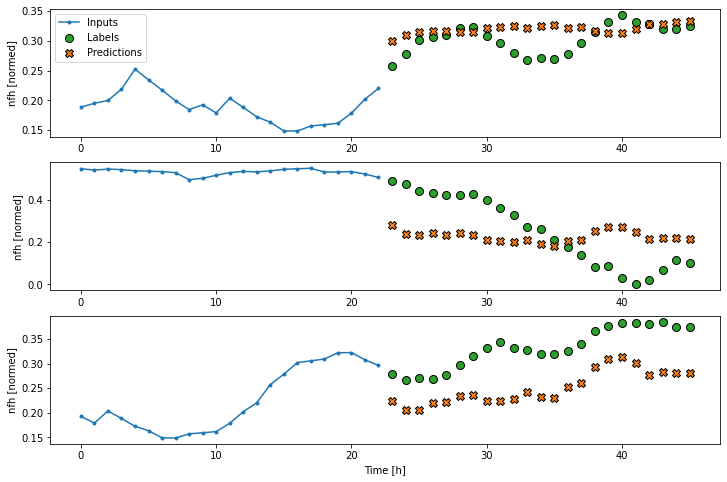

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### **Dense Model**

1/1 [==============================] - 0s 65ms/step - loss: 59064.0000 - mean_absolute_error: 43.6255


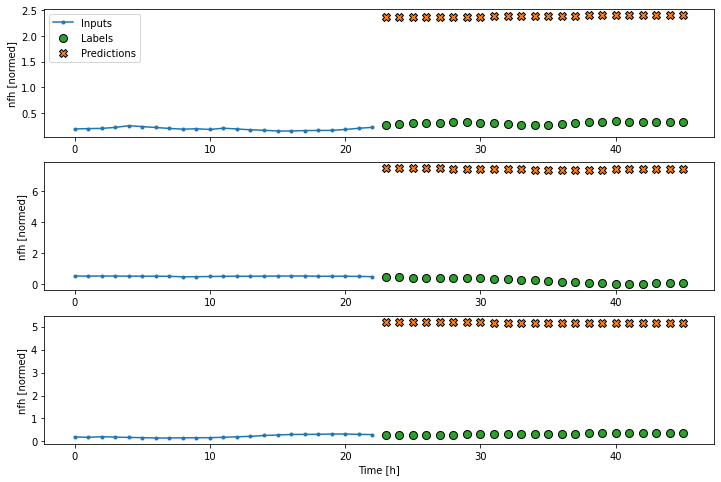

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

### **CNN Model**

1/1 [==============================] - 0s 67ms/step - loss: 56467.0234 - mean_absolute_error: 42.3246


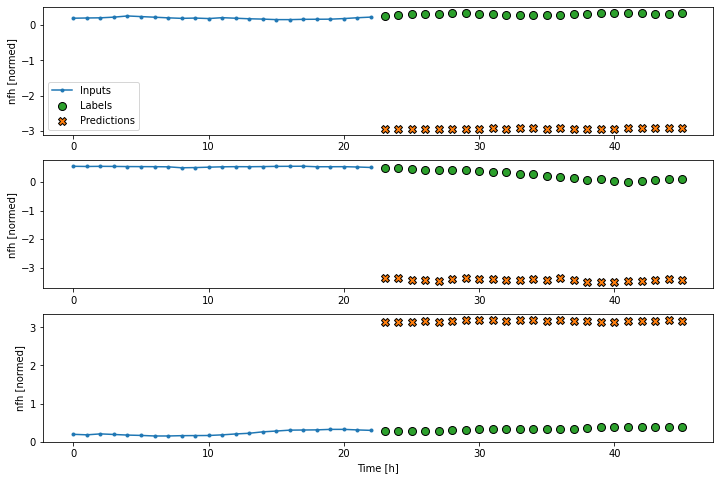

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#### **RNN Model**

1/1 [==============================] - 0s 73ms/step - loss: 54614.5156 - mean_absolute_error: 40.0504


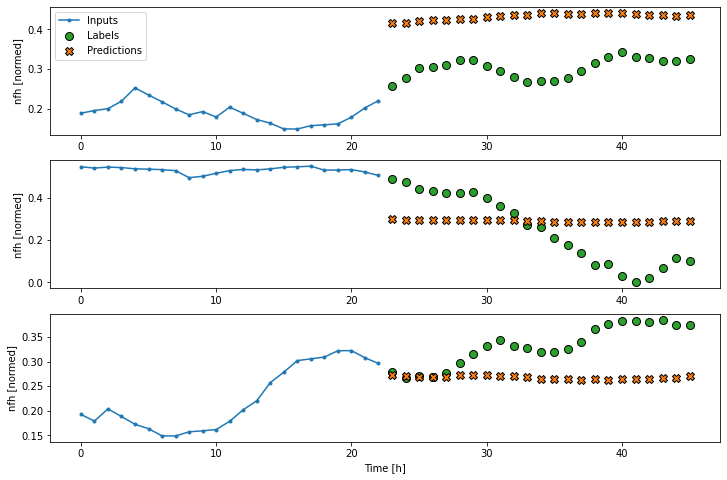

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### **Auto Regression models**

**RNN**

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 23])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 23, 23)


1/1 [==============================] - 0s 70ms/step - loss: 54623.1523 - mean_absolute_error: 40.2453


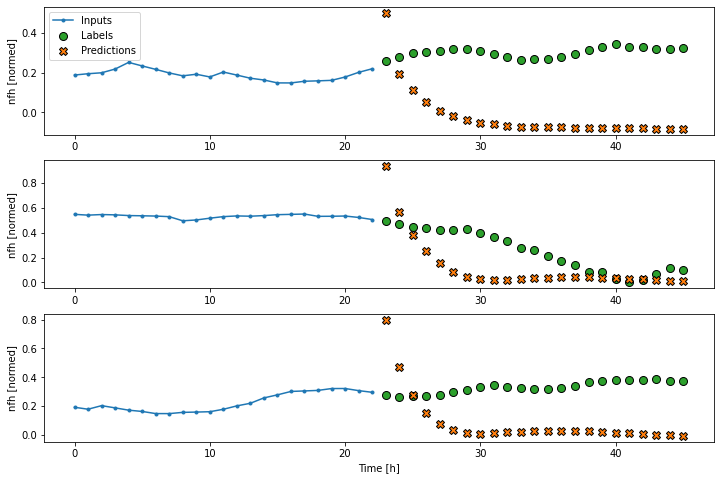

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### **Model Performance Chart**

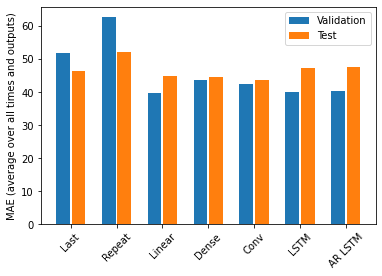

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 46.3492
Repeat  : 52.0163
Linear  : 44.9363
Dense   : 44.4928
Conv    : 43.6177
LSTM    : 47.3726
AR LSTM : 47.5978


**This would be the results for forecasting the NFH column using the same
Note: The results for forecasting NFH column would be the same as the results concluded by the dependent model**

### **NFL-column Time Series Forecasting**

**As discussed earlier since this is no such pipeline model consideration hence we would assume that NFH column is not present during NFL time series forecasting**

In [ ]:
train_df=train_df1.copy()
val_df=val_df1.copy()
test_df=test_df1.copy()
num_features = train_df.shape[1] 

In [ ]:
train_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,nfh,nfl
0,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,0.537827,0.571552
1,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,0.549968,0.574100
2,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,0.552886,0.575098
3,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,0.545863,0.557377
4,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,0.539722,0.552135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.813531,0.801525,0.147839,0.079317,0.386803,0.250564,0.655676,-2372.54,0.091459,0.377544,-0.21,0.0692,-0.30,2.01,-0.1293,0.3506,-0.80,-0.810001,-5.026111e-12,1.0,0.130923,0.991393,0.804795,0.809794
244,0.815255,0.817144,0.099136,0.069663,0.308742,0.224393,0.648190,-2610.13,0.063464,0.589626,-0.27,-0.5692,0.65,2.09,0.1693,-0.0772,-0.45,2.520000,-6.682411e-12,1.0,0.181890,0.983319,0.814407,0.819800
245,0.833183,0.835068,0.095019,0.104560,0.239417,0.318142,0.620449,-1334.5,0.087960,0.397242,0.83,0.1700,2.18,1.02,-0.2105,0.2796,0.02,-0.750000,-2.383872e-12,1.0,0.198778,0.980044,0.829200,0.836747
246,0.840029,0.848669,0.107597,0.098429,0.274724,0.337656,0.781886,-2370.17,0.052965,0.654629,-0.52,-0.1018,-1.01,0.57,-0.1940,-0.0230,0.06,-1.120001,-1.263725e-11,1.0,0.215608,0.976480,0.842815,0.847269


In [ ]:
train_df=train_df.drop(columns='nfh')
val_df=val_df.drop(columns='nfh')
test_df=test_df.drop(columns='nfh')
# to avoid certain dimension error hence i have taken the liberty to add a dummy column with extra zeroes so as to by pass the error and also i would like to point out that this wont affect the alogrithms performance in any way, the algorithm this type of error is the base line algorithm , if i remove the same sir then we would lose around 50 % of the algorithms,as most of the alogithms are base line models, from my perspective i see this as a run time error as due to the fact that this error appears in this section of the alogrithm and not else where sir, so kindly do consider the same sir 
train_df['dum']=0
val_df['dum']=0
test_df['dum']=0
train_df['NFL']=train_df['nfl']
val_df['NFL']=val_df['nfl']
test_df['NFL']=test_df['nfl']
train_df=train_df.drop(columns='nfl')
val_df=val_df.drop(columns='nfl')
test_df=test_df.drop(columns='nfl')
#renaming the same
train_df['nfl']=train_df['NFL']
val_df['nfl']=val_df['NFL']
test_df['nfl']=test_df['NFL']
train_df=train_df.drop(columns='NFL')
val_df=val_df.drop(columns='NFL')
test_df=test_df.drop(columns='NFL')
# The reason to perform the same is that ,it has been proven that moving the dependnt position to the last row would improves the algorithm's efficiency and hence we might expect good results( the same method followed last time)
num_features = train_df.shape[1] 

In [ ]:
train_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,dum,nfl
0,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,0,0.571552
1,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,0,0.574100
2,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,0,0.575098
3,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,0,0.557377
4,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,0,0.552135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.813531,0.801525,0.147839,0.079317,0.386803,0.250564,0.655676,-2372.54,0.091459,0.377544,-0.21,0.0692,-0.30,2.01,-0.1293,0.3506,-0.80,-0.810001,-5.026111e-12,1.0,0.130923,0.991393,0,0.809794
244,0.815255,0.817144,0.099136,0.069663,0.308742,0.224393,0.648190,-2610.13,0.063464,0.589626,-0.27,-0.5692,0.65,2.09,0.1693,-0.0772,-0.45,2.520000,-6.682411e-12,1.0,0.181890,0.983319,0,0.819800
245,0.833183,0.835068,0.095019,0.104560,0.239417,0.318142,0.620449,-1334.5,0.087960,0.397242,0.83,0.1700,2.18,1.02,-0.2105,0.2796,0.02,-0.750000,-2.383872e-12,1.0,0.198778,0.980044,0,0.836747
246,0.840029,0.848669,0.107597,0.098429,0.274724,0.337656,0.781886,-2370.17,0.052965,0.654629,-0.52,-0.1018,-1.01,0.57,-0.1940,-0.0230,0.06,-1.120001,-1.263725e-11,1.0,0.215608,0.976480,0,0.847269


**Window Generator**

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['nfl'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['nfl']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['nfl'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['nfl']

**Splitting Window**

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]).astype(np.float32),
                           np.array(train_df[100:100+w2.total_window_size]).astype(np.float32),
                           np.array(train_df[200:200+w2.total_window_size]).astype(np.float32)])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 24)
Inputs shape: (3, 6, 24)
labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

In [ ]:
w2.example

(<tf.Tensor: shape=(3, 6, 24), dtype=float32, numpy=
 array([[[ 5.50681829e-01,  5.61093152e-01,  2.50967452e-03,
           0.00000000e+00,  2.42583781e-01,  1.35338187e-01,
           1.75187483e-01,  6.39500008e+01,  1.18131086e-01,
           1.11621797e-01, -9.99999978e-03,  3.97000015e-01,
          -9.80000019e-01,  7.20000029e-01, -5.20000011e-02,
           3.99000011e-02, -1.00000001e-01, -1.30999947e+00,
          -3.37180370e-12,  1.00000000e+00,  1.50518613e-02,
           9.99886692e-01,  0.00000000e+00,  5.71552336e-01],
         [ 5.60136974e-01,  5.65259576e-01,  2.80253664e-02,
           1.95133202e-02,  2.58090734e-01,  6.99386075e-02,
           2.20660731e-01, -1.02919995e+03,  7.30161741e-02,
           4.34011817e-01, -2.30000004e-01, -5.09999990e-01,
          -1.33000004e+00,  4.60000008e-01,  4.42999989e-01,
           5.64800024e-01,  7.99999982e-02,  1.55000019e+00,
           9.26734926e-13,  1.00000000e+00,  3.22496146e-02,
           9.99479830e-01,  0.0

In [ ]:
def plot(self, model=None, plot_col='nfl', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

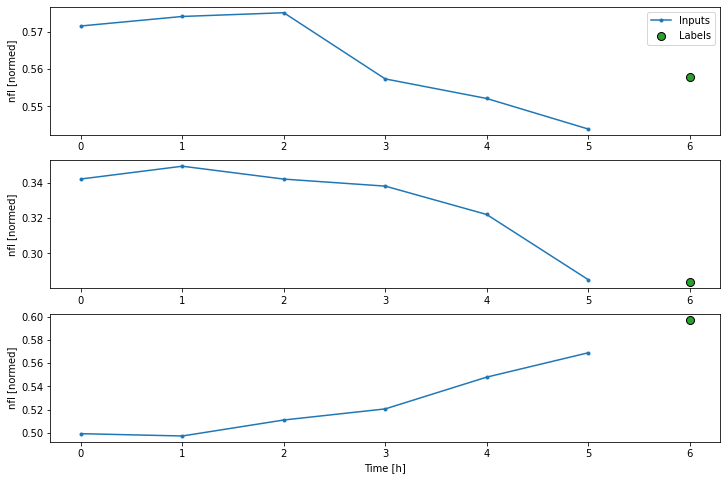

In [ ]:
w2.plot()

In [ ]:
train_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,dum,nfl
0,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,0,0.571552
1,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,0,0.574100
2,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,0,0.575098
3,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,0,0.557377
4,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,0,0.552135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.813531,0.801525,0.147839,0.079317,0.386803,0.250564,0.655676,-2372.54,0.091459,0.377544,-0.21,0.0692,-0.30,2.01,-0.1293,0.3506,-0.80,-0.810001,-5.026111e-12,1.0,0.130923,0.991393,0,0.809794
244,0.815255,0.817144,0.099136,0.069663,0.308742,0.224393,0.648190,-2610.13,0.063464,0.589626,-0.27,-0.5692,0.65,2.09,0.1693,-0.0772,-0.45,2.520000,-6.682411e-12,1.0,0.181890,0.983319,0,0.819800
245,0.833183,0.835068,0.095019,0.104560,0.239417,0.318142,0.620449,-1334.5,0.087960,0.397242,0.83,0.1700,2.18,1.02,-0.2105,0.2796,0.02,-0.750000,-2.383872e-12,1.0,0.198778,0.980044,0,0.836747
246,0.840029,0.848669,0.107597,0.098429,0.274724,0.337656,0.781886,-2370.17,0.052965,0.654629,-0.52,-0.1018,-1.01,0.57,-0.1940,-0.0230,0.06,-1.120001,-1.263725e-11,1.0,0.215608,0.976480,0,0.847269


**Creating Dataset for Model**

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

**Creating windows for training ,testing and validation based on train ,test val dataset**

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 24), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 24)
Labels shape (batch, time, features): (32, 1, 1)


## **Model Training/Evaluation (Time series forecasting for columns='nfl')**

### **Single Step Time Forecasting Models**

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['nfl'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['nfl']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 24)
Labels shape (batch, time, features): (32, 1, 1)


#### **BaseLine Model**

In [ ]:
single_step_window.test

<MapDataset shapes: ((None, 1, 24), (None, 1, 1)), types: (tf.float32, tf.float32)>

In [ ]:
train_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,dum,nfl
0,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,0,0.571552
1,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,0,0.574100
2,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,0,0.575098
3,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,0,0.557377
4,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,0,0.552135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.813531,0.801525,0.147839,0.079317,0.386803,0.250564,0.655676,-2372.54,0.091459,0.377544,-0.21,0.0692,-0.30,2.01,-0.1293,0.3506,-0.80,-0.810001,-5.026111e-12,1.0,0.130923,0.991393,0,0.809794
244,0.815255,0.817144,0.099136,0.069663,0.308742,0.224393,0.648190,-2610.13,0.063464,0.589626,-0.27,-0.5692,0.65,2.09,0.1693,-0.0772,-0.45,2.520000,-6.682411e-12,1.0,0.181890,0.983319,0,0.819800
245,0.833183,0.835068,0.095019,0.104560,0.239417,0.318142,0.620449,-1334.5,0.087960,0.397242,0.83,0.1700,2.18,1.02,-0.2105,0.2796,0.02,-0.750000,-2.383872e-12,1.0,0.198778,0.980044,0,0.836747
246,0.840029,0.848669,0.107597,0.098429,0.274724,0.337656,0.781886,-2370.17,0.052965,0.654629,-0.52,-0.1018,-1.01,0.57,-0.1940,-0.0230,0.06,-1.120001,-1.263725e-11,1.0,0.215608,0.976480,0,0.847269


In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['nfl'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 3ms/step - loss: 3.8582e-04 - mean_absolute_error: 0.0153


In [ ]:
wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1,
    label_columns=['nfl'])

wide_window

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): ['nfl']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 23, 24)
Output shape: (32, 23, 1)


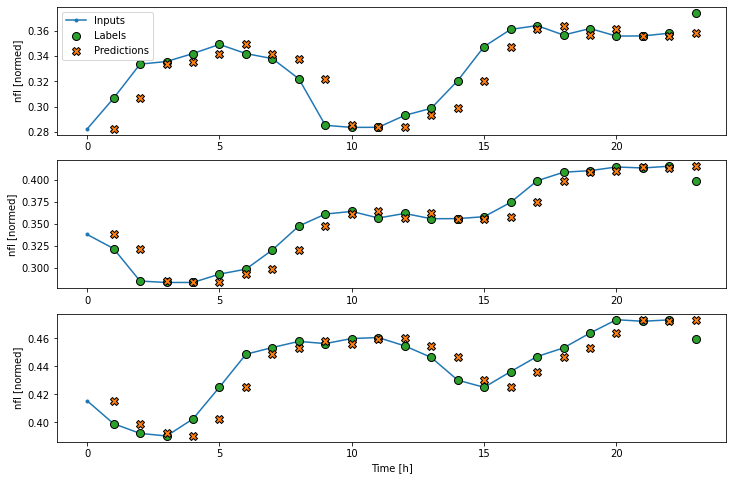

In [ ]:
wide_window.plot(baseline)

#### **Linear Model**

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 23, 24)
Output shape: (32, 23, 1)


In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
8/8 [==============================] - 1s 29ms/step - loss: 144759.1406 - mean_absolute_error: 278.2781 - val_loss: 61178.0586 - val_mean_absolute_error: 206.1388
Epoch 2/20
8/8 [==============================] - 0s 18ms/step - loss: 135548.0625 - mean_absolute_error: 269.0627 - val_loss: 57112.8711 - val_mean_absolute_error: 199.1746
Epoch 3/20
8/8 [==============================] - 0s 11ms/step - loss: 126115.6484 - mean_absolute_error: 259.8176 - val_loss: 53203.7383 - val_mean_absolute_error: 192.2408
Epoch 4/20
8/8 [==============================] - 0s 19ms/step - loss: 117210.6094 - mean_absolute_error: 250.6032 - val_loss: 49487.9766 - val_mean_absolute_error: 185.4091
Epoch 5/20
8/8 [==============================] - 0s 13ms/step - loss: 109204.2422 - mean_absolute_error: 241.7028 - val_loss: 45862.9922 - val_mean_absolute_error: 178.4930
Epoch 6/20
8/8 [==============================] - 0s 14ms/step - loss: 100996.1250 - mean_absolute_error: 232.4387 - val_loss: 425

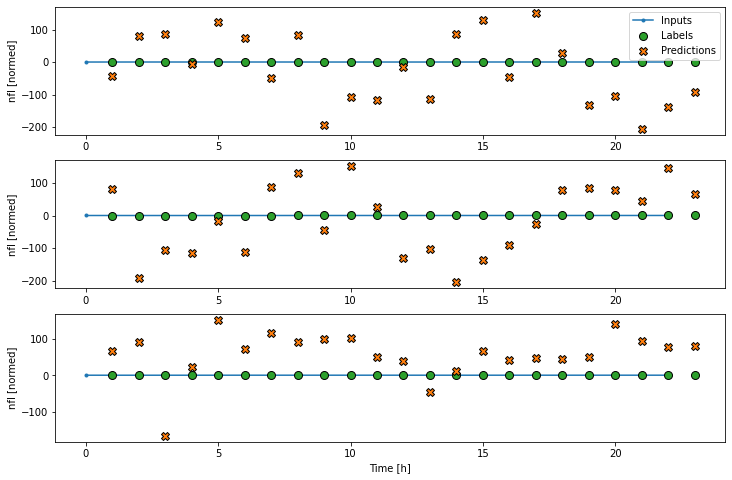

In [ ]:
wide_window.plot(linear)

#### **Dense Model**

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
8/8 [==============================] - 1s 53ms/step - loss: 7582.7427 - mean_absolute_error: 56.8182 - val_loss: 76.8099 - val_mean_absolute_error: 7.2851
Epoch 2/20
8/8 [==============================] - 0s 19ms/step - loss: 979.1452 - mean_absolute_error: 19.8993 - val_loss: 245.0292 - val_mean_absolute_error: 13.3770
Epoch 3/20
8/8 [==============================] - 0s 25ms/step - loss: 361.4073 - mean_absolute_error: 12.5019 - val_loss: 48.0188 - val_mean_absolute_error: 5.5523
Epoch 4/20
8/8 [==============================] - 0s 22ms/step - loss: 47.3999 - mean_absolute_error: 4.3215 - val_loss: 8.2177 - val_mean_absolute_error: 2.5170
Epoch 5/20
8/8 [==============================] - 0s 25ms/step - loss: 5.1557 - mean_absolute_error: 1.4867 - val_loss: 1.4516 - val_mean_absolute_error: 1.1784
Epoch 6/20
8/8 [==============================] - 0s 25ms/step - loss: 1.0757 - mean_absolute_error: 0.7895 - val_loss: 0.4703 - val_mean_absolute_error: 0.6708
Epoch 7/20
8/8 [==

#### **Multi Step Dense Model**

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['nfl'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['nfl']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

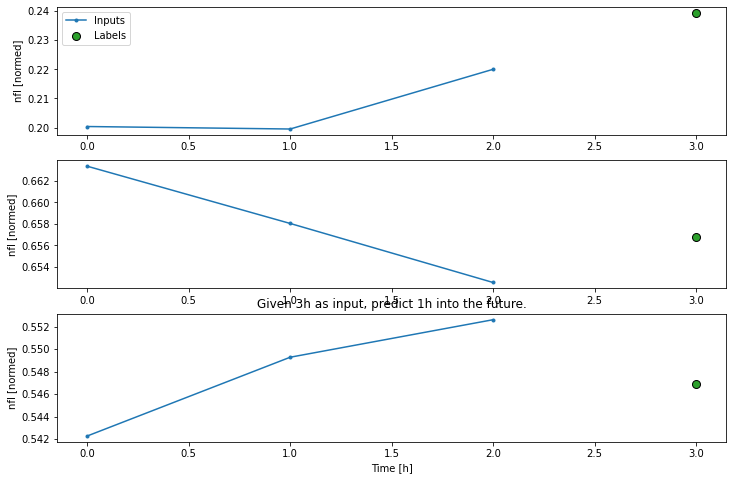

In [ ]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=320, activation='relu'),
    tf.keras.layers.Dense(units=640, activation='relu'),
    tf.keras.layers.Dense(units=960, activation='relu'),
    tf.keras.layers.Dense(units=1280, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 24)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 0s 8ms/step - loss: 0.4050 - mean_absolute_error: 0.5635


In [ ]:
print('Input shape:', wide_window.example[0].shape)

Input shape: (32, 23, 24)


#### **Convolutional Neural Network Model**

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=15000,kernel_size=(CONV_WIDTH,),activation='relu'),
    tf.keras.layers.Dense(units=12500, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 24)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 1s 305ms/step - loss: 195.2483 - mean_absolute_error: 10.6664


In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 23, 24)
Labels shape: (32, 23, 1)
Output shape: (32, 21, 1)


In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['nfl'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['nfl']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 24)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


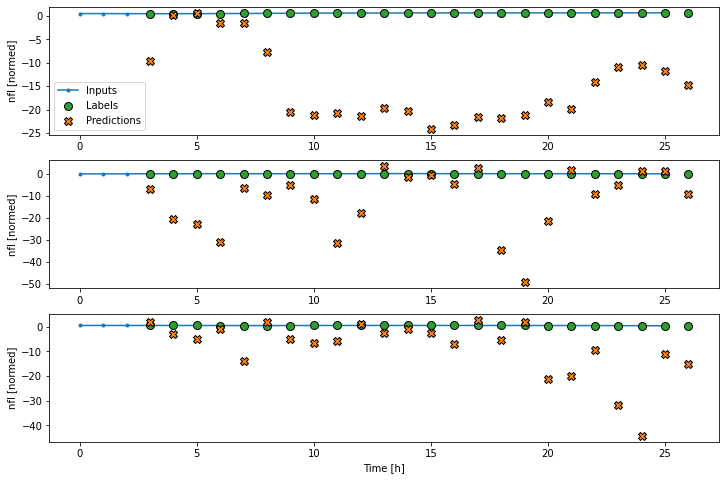

In [ ]:
wide_conv_window.plot(conv_model)

#### **Recurrent neural network Model**

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(200, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 23, 24)
Output shape: (32, 23, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 45ms/step - loss: 0.2541 - mean_absolute_error: 0.4930


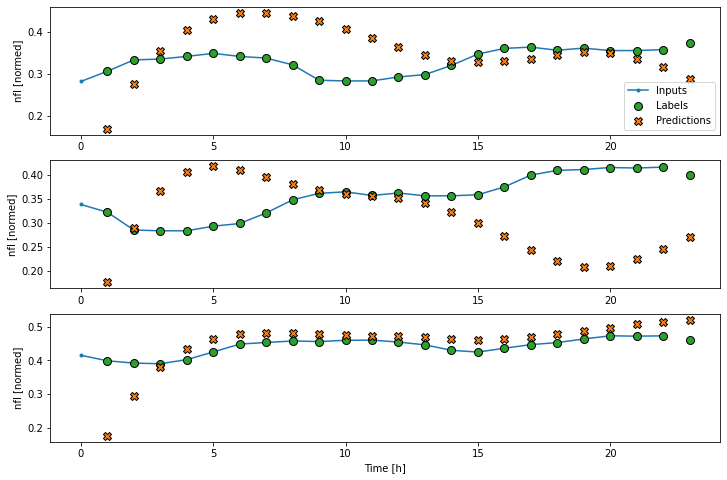

In [ ]:
wide_window.plot(lstm_model)

#### **Model Performance Chart**

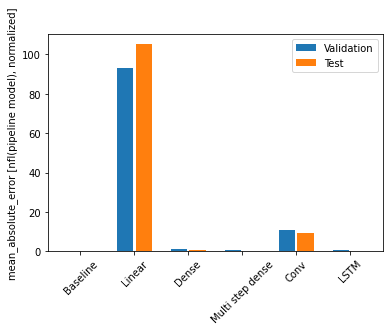

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [nfl(pipeline model), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0112
Linear      : 105.1917
Dense       : 0.7244
Multi step dense: 0.3941
Conv        : 9.4322
LSTM        : 0.2853


### **Multi-output Time Forecasting models**

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 24)
Labels shape (batch, time, features): (32, 24, 24)


#### **Baseline Model**

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 8ms/step - loss: 45273.2773 - mean_absolute_error: 35.3469


In [ ]:
num_features = train_df.shape[1] 

dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 5ms/step - loss: 39389.0312 - mean_absolute_error: 38.3440


#### **RNN Model**

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

2/2 [==============================] - 0s 9ms/step - loss: 50502.6367 - mean_absolute_error: 38.5790

CPU times: user 8.3 s, sys: 464 ms, total: 8.76 s
Wall time: 8.37 s


### **Model Performance Chart**

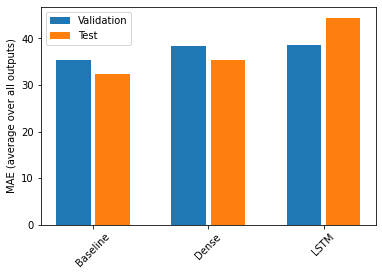

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 32.4228
Dense          : 35.4192
LSTM           : 44.5071


### **Multi-step models**

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

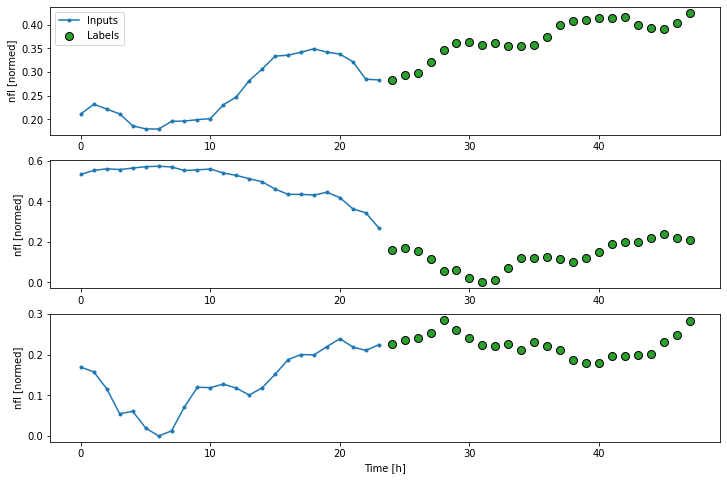

In [ ]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

#### **Baseline Model**

1/1 [==============================] - 0s 132ms/step - loss: 86724.0000 - mean_absolute_error: 49.1883


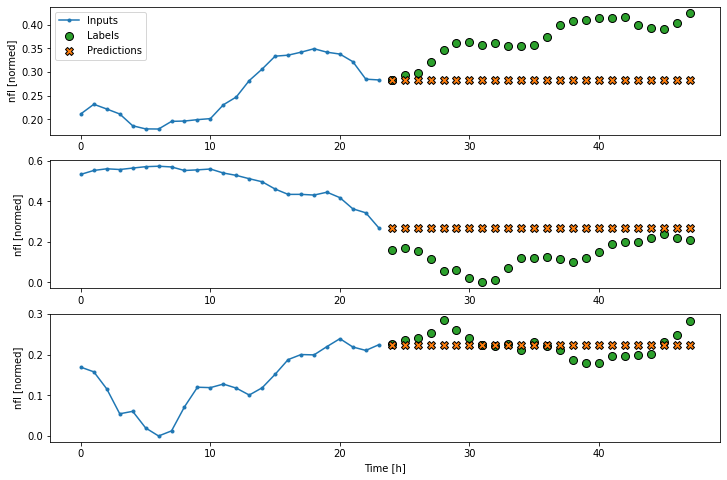

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

1/1 [==============================] - 0s 123ms/step - loss: 119136.3984 - mean_absolute_error: 58.7399


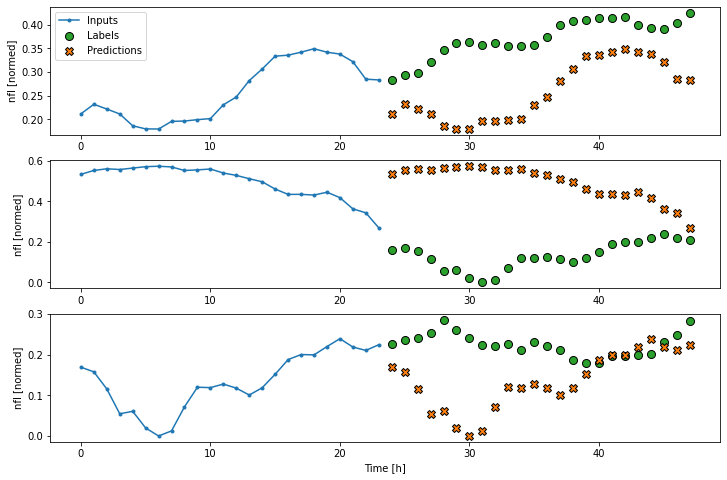

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### **Single-shot models**

#### **Multi Linear Model**

1/1 [==============================] - 0s 60ms/step - loss: 53241.5352 - mean_absolute_error: 38.7040


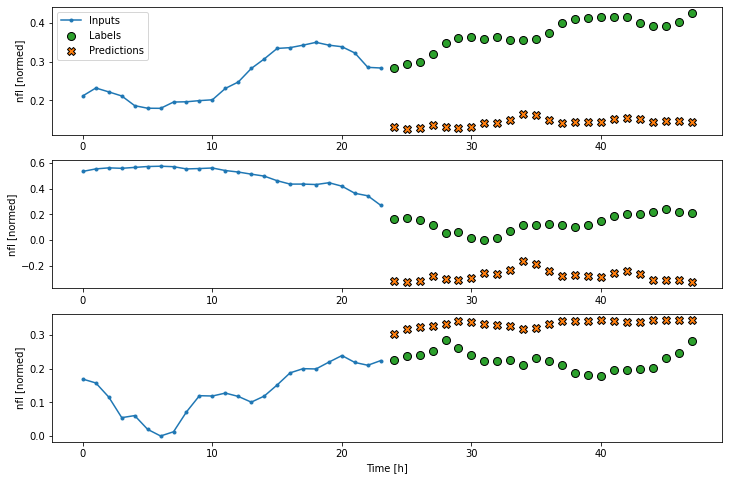

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### **Dense Model**

1/1 [==============================] - 0s 65ms/step - loss: 58530.9219 - mean_absolute_error: 42.1893


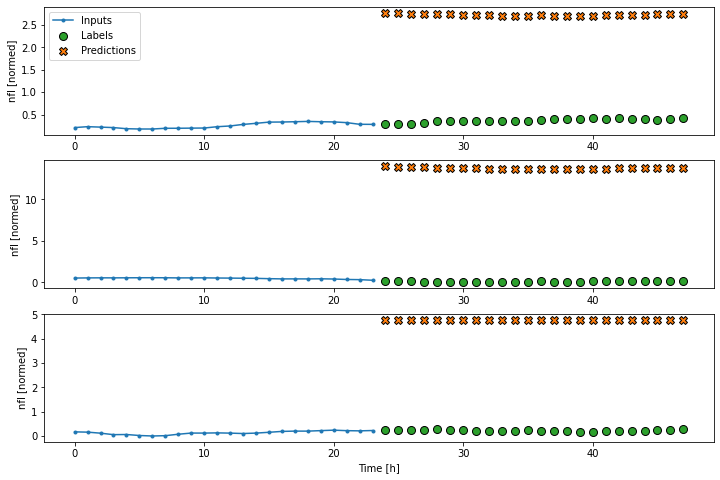

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

#### **CNN Model**

1/1 [==============================] - 0s 68ms/step - loss: 57219.4492 - mean_absolute_error: 41.8914


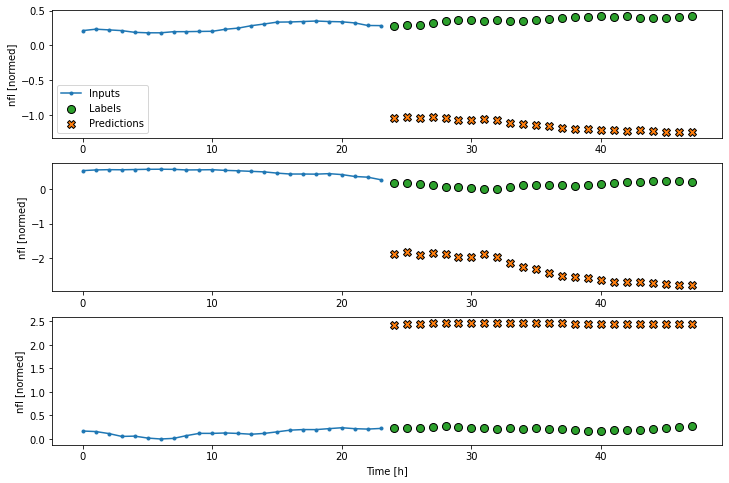

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#### **RNN Model**

1/1 [==============================] - 0s 79ms/step - loss: 53339.9062 - mean_absolute_error: 38.7705


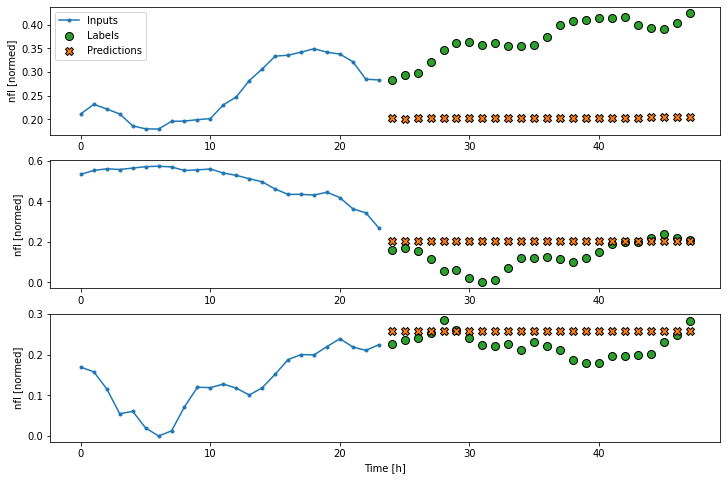

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### **Autoregressive model**

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 24])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 24)


1/1 [==============================] - 0s 60ms/step - loss: 53357.6680 - mean_absolute_error: 38.9449


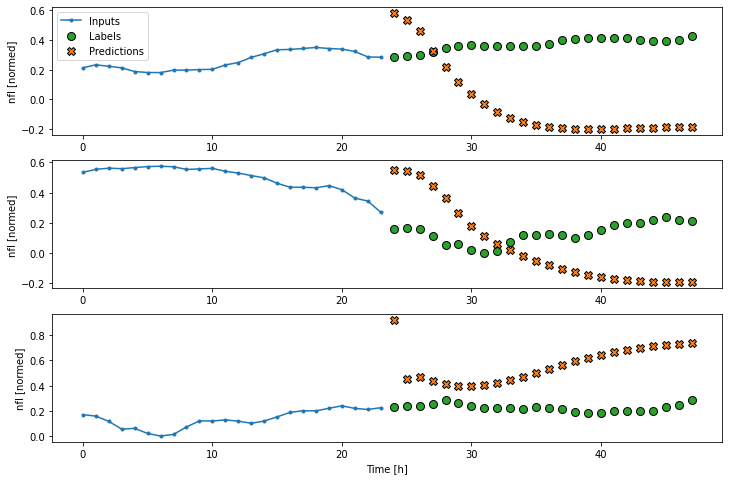

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### **Model Performance Chart**


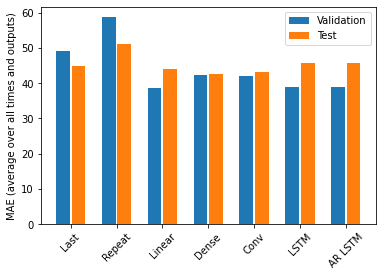

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 44.9041
Repeat  : 51.1754
Linear  : 44.1133
Dense   : 42.7098
Conv    : 43.2349
LSTM    : 45.6204
AR LSTM : 45.8413


**This would be the results for forecasting the NFL column using the same**

**Conclusion of Independent Model Analysis: Here after scaling down the values and performing the same analysis on the dataset we can see that the mae rate has decreased to a level and almost all algorithms perform well except linear algorithm compared to the results of the same analysis performed under Time Series Forecasting of NFH and NFL without scaling.**


**Queries at this stage:**

**1) Suppose if i follow the same method and perform the training practically and make the prediction then how shall i make the reverse process of the saling so as to observe the actual values?**

**A) we can use inverse_fit_transform method which would automatoically map the scaled  predicted values to the original  values sir**

**For example : if the input value say is 100 then after performing the scaling the value would be 0.5,suppose after performing the training and making the predictions, the predicted values would originally be in the scaled form like say for instance we have 0.5 as the predicted value for 100 then we can use the inverse_fit_transform which would perform the reverse process of the scaling process so it would convert the scaled predicted values back to its original scale values like say for this 0.5 predicted value  it would map the same back to its original scale value 100 sir.**

## **Overall Conclusion:**


**1)It is practically proven that by scaling down the values a drastic reduction in mae and loss has been noticed which is a good sign sir , followed by which if we increase the epochs count t a considerable level then the algorithms wouyld perform far better than the algorithms mentioned under Time Series Forecasting of NFH and NFL without scaling , so hence the same can applied for furture datasets which follow the same type of data**

**2) Based on  dependent model analysis and independent model analysis , in both the algorithms their respective subcategory of models equally perform , hence either of the models/algorithm could be choosen  by user based on user's preference / requirements sir**

Thank you